In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
def traj_computation(epsilon,a,b,Iext,theta,T,N,v0,w0,plot=1):
    def F(x):
        v,w = x
        dv  = v - (v**3)/3 - w + Iext
        dw  = epsilon*(v + a - b*w)
        return np.array([dv,dw])

    def J(x):
        v,w = x
        J11 = 1 - theta*dt*(1-v**2)
        J12 = dt*theta
        J21 = -dt*theta*epsilon
        J22 = 1 + dt*theta*b*epsilon
        return np.array([[J11,J12],[J21,J22]])

    def Newton(x,f,maxit,tol):
        i = 0
        converged = False
        x_old = x.copy()

        def g(x_current):
            return x_current - f(x_current)

        while not converged:
            i += 1
            Jacobian_g = J(x_old)
            delta_x = np.linalg.solve(Jacobian_g, -g(x_old))
            x_new = x_old + delta_x
            if i >= maxit or np.linalg.norm(g(x_new)) < tol or np.linalg.norm(delta_x) < tol:
                converged = True
            else:
                x_old = x_new.copy()

        return x_new

    dt    = T/N;
    tt    = np.linspace(0,T,N+1)
    x     = np.array([v0,w0])

    x_old = x.copy()
    for t in tt[1:]:
        C = x_old + dt*(1-theta)*F(x_old)
        def RHS(x):
            return C + dt*theta*F(x)
        x_new = Newton(x_old,RHS,10,1e-7)
        x = np.vstack((x,x_new))
        x_old = x_new.copy()

    if plot == 1:
        plt.figure(figsize=(5, 3))
        plt.plot(tt, x[:, 0], label='v')
        plt.plot(tt, x[:, 1], label='w')
        plt.xlabel('Time (tt)')
        plt.ylabel('Values (v, w)')
        plt.title('Plot of v and w against Time')
        plt.legend()
        plt.grid(True)
        plt.show()

    return x


def check_limit_cycle(trajectory):
	check_v = 3/4*np.max(trajectory[:, 0])
	check_w = 3/4*np.max(trajectory[:, 1])
	num_v   = 0
	num_w   = 0
	epsilon = 0
		
	for i in range(trajectory.shape[0] - 1):
		epsilon += np.abs(trajectory[i, 0] - trajectory[i + 1, 0]) + np.abs(trajectory[i, 1] - trajectory[i + 1, 1])
	epsilon /= 2*(trajectory.shape[0] - 1)

	for i in range(trajectory.shape[0]):
		if np.abs(trajectory[i, 0]-check_v)<epsilon:
			num_v += 1
		if np.abs(trajectory[i, 1]-check_w)<epsilon:
			num_w += 1

	if num_v > 2 and num_w > 2:
		return True
	else:
		return False

# Epsilon

Il parametro epsilon influenza il periodo delle oscillazioni: aumentando epsilon la frequenza aumenta fino a un certo valore limite (che dipende dagli altri parametri, in questa configurazione è 1.1631578947368422), oltre il quale le traiettorie non presentano più cicli limite

Epsilon =  0.01


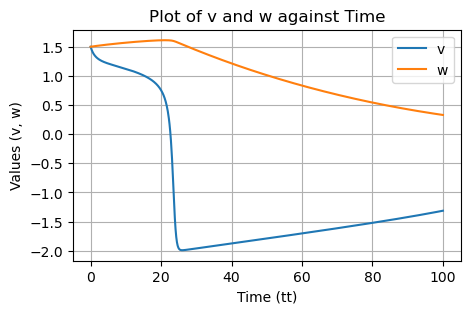

Epsilon =  0.12


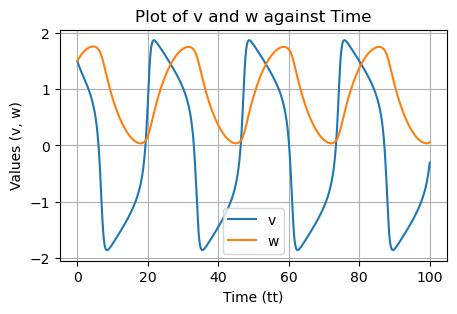

Epsilon =  0.23


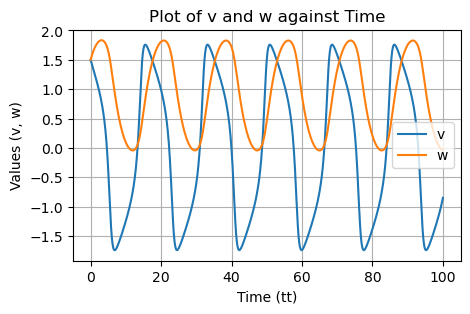

Epsilon =  0.34


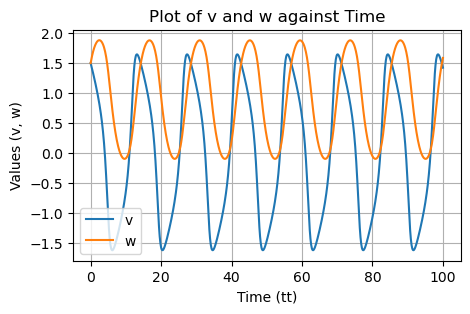

Epsilon =  0.45


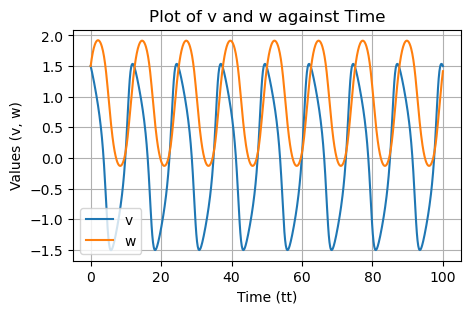

Epsilon =  0.56


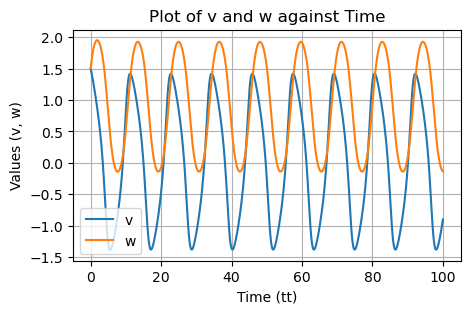

Epsilon =  0.67


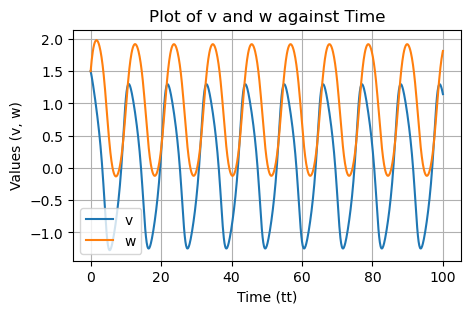

Epsilon =  0.78


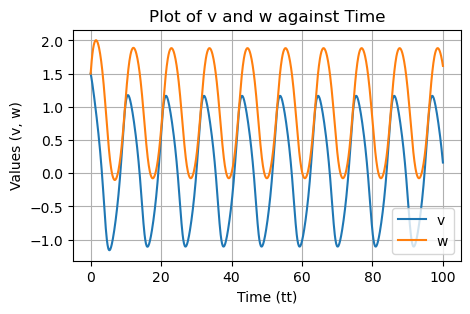

Epsilon =  0.89


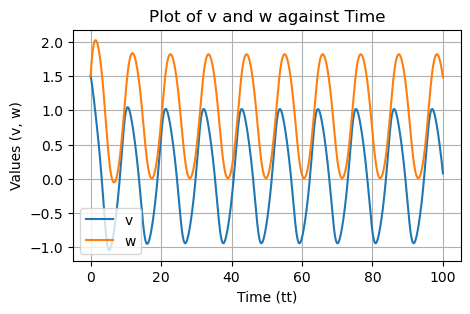

Epsilon =  1.0


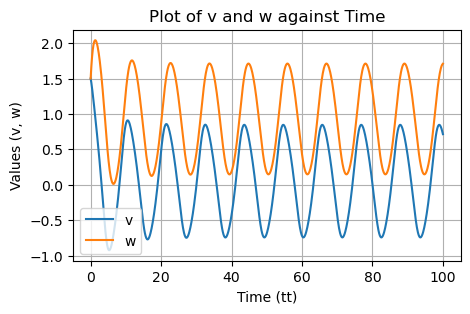

In [4]:
theta = 1
T     = 100
N     = 1000
dt    = T/N
NT    = 10

a       = 0.7
b       = 0.8
Iext    = 0.9
v0      = 1.5
w0      = v0

epsilon = np.linspace(0.01,1,NT)

for i in range(1,NT+1):
	print("Epsilon = ",epsilon[i-1])
	x_temp = traj_computation(epsilon[i-1],a,b,Iext,theta,T,N,v0,w0,1)

Epsilon =  1.1


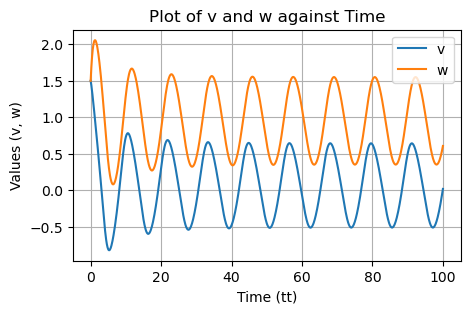

Epsilon =  1.1333333333333333


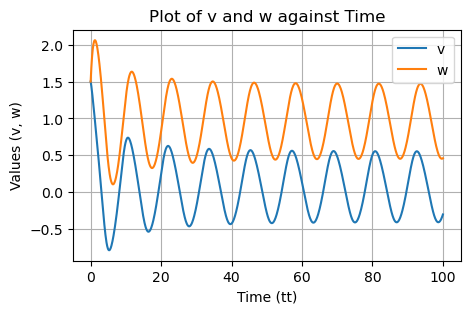

Epsilon =  1.1666666666666667


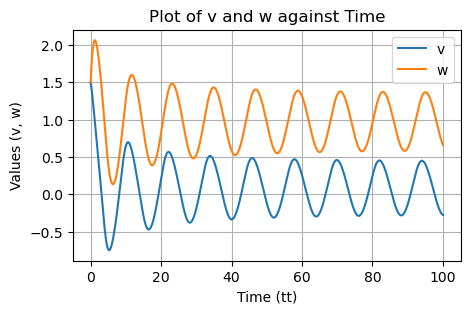

Epsilon =  1.2


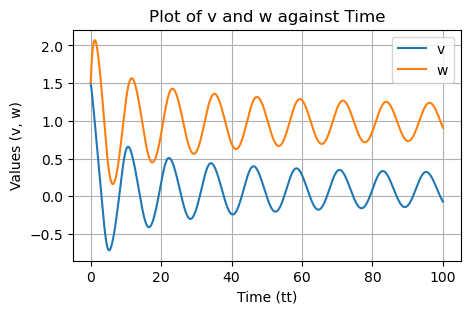

Epsilon =  1.2333333333333334


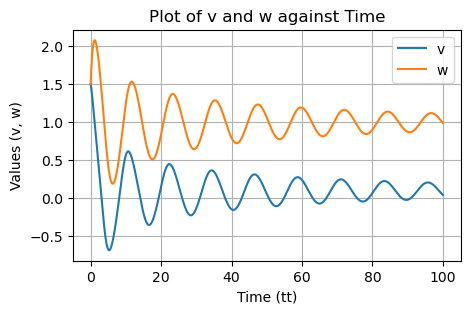

Epsilon =  1.2666666666666666


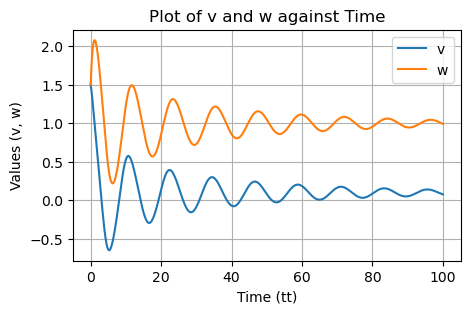

Epsilon =  1.3


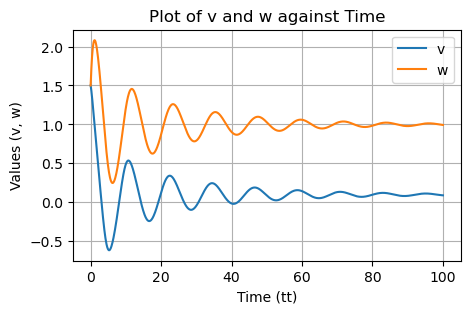

Epsilon =  1.3333333333333333


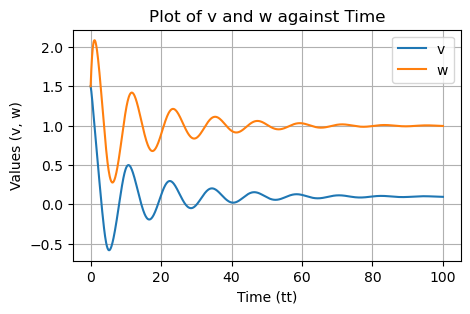

Epsilon =  1.3666666666666667


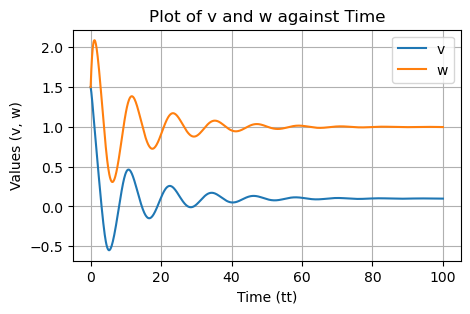

Epsilon =  1.4


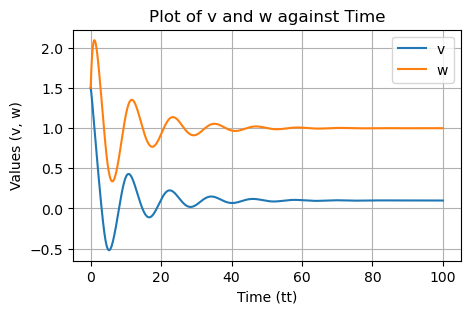

In [5]:
epsilon = np.linspace(1.1,1.4,NT)

for i in range(1,NT+1):
	print("Epsilon = ",epsilon[i-1])
	x_temp = traj_computation(epsilon[i-1],a,b,Iext,theta,T,N,v0,w0,1)

# a

Il parametro a influenza la presenza di cicli limite. Con questa configurazione di parametri, l'intervallo in cui compaiono cicli limite è (0.2814285714285714, 1.1591836734693877)

a =  0.1


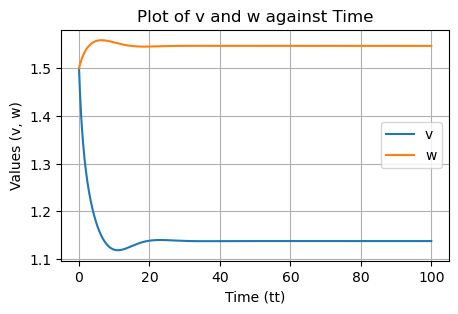

a =  0.24444444444444444


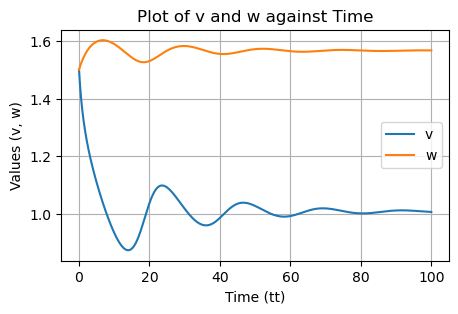

a =  0.38888888888888884


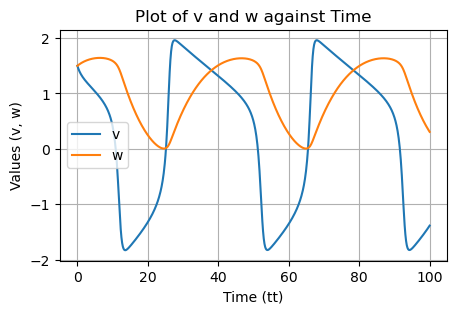

a =  0.5333333333333333


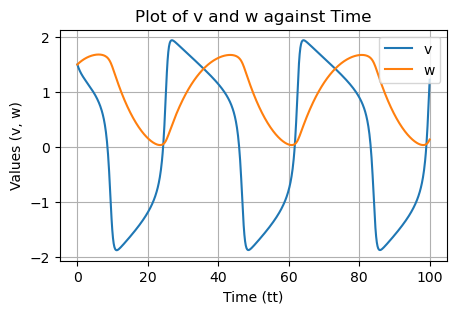

a =  0.6777777777777777


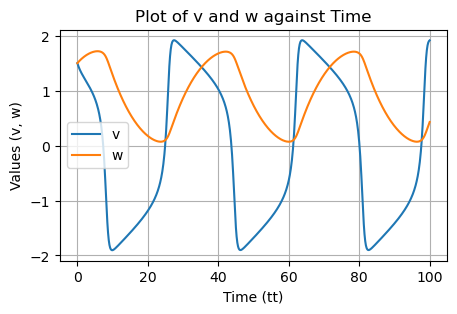

a =  0.8222222222222221


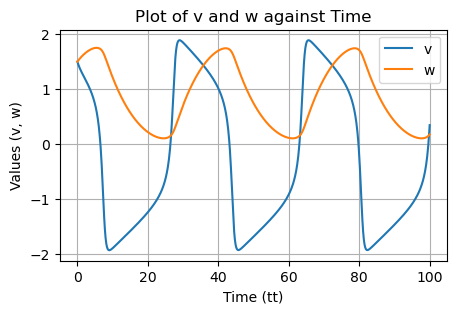

a =  0.9666666666666666


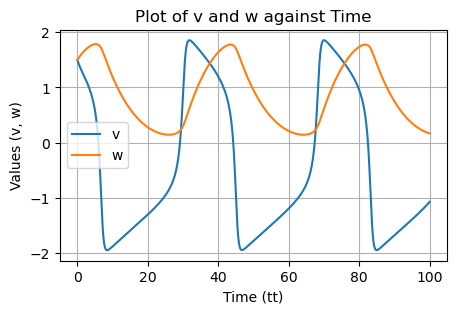

a =  1.1111111111111112


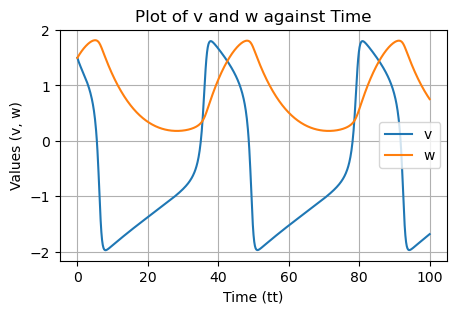

a =  1.2555555555555555


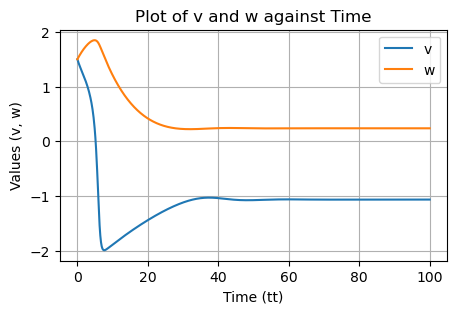

a =  1.4


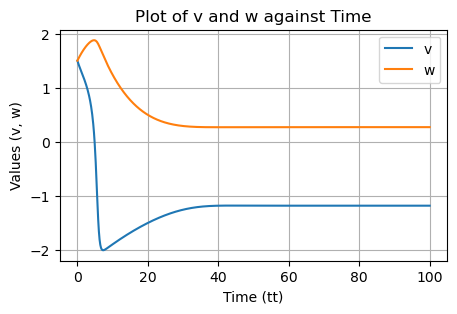

In [6]:
theta = 1
T     = 100
N     = 1000
dt    = T/N
NT    = 10

epsilon = 1/12.5
b       = 0.8
Iext    = 0.9
v0      = 1.5
w0      = v0

a = np.linspace(0.1,1.4,NT)

for i in range(1,NT+1):
	print("a = ",a[i-1])
	x_temp = traj_computation(epsilon,a[i-1],b,Iext,theta,T,N,v0,w0,1)

È interessante notare le traiettorie diverse che si generano per valori di a compresi nell'intervallo (0.2724489795918367, 0.2814285714285714)

a =  0.265


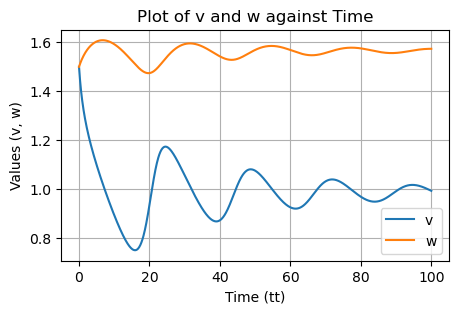

a =  0.2677777777777778


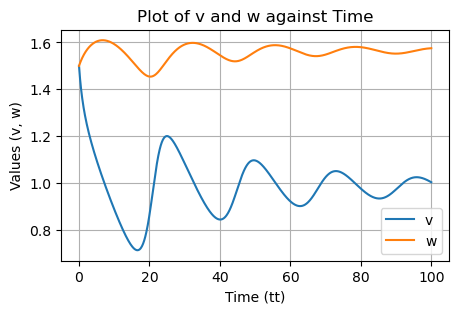

a =  0.27055555555555555


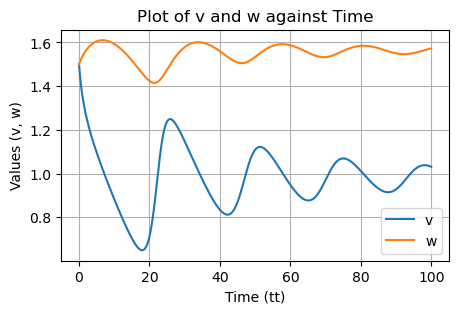

a =  0.2733333333333333


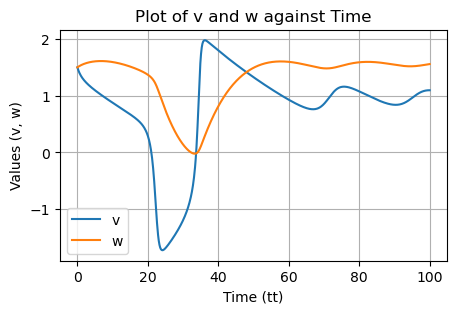

a =  0.2761111111111111


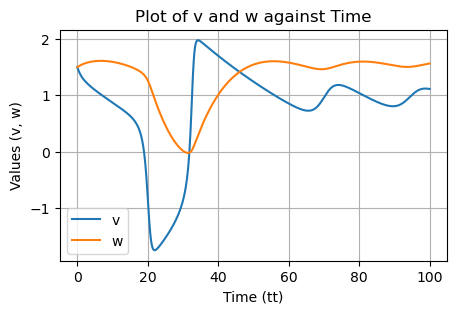

a =  0.2788888888888889


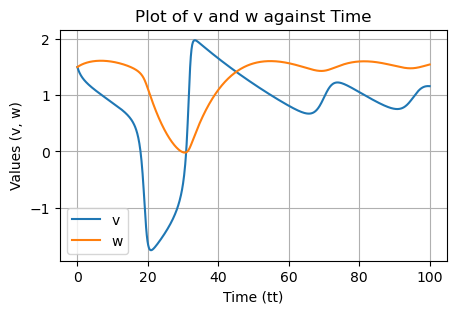

a =  0.2816666666666667


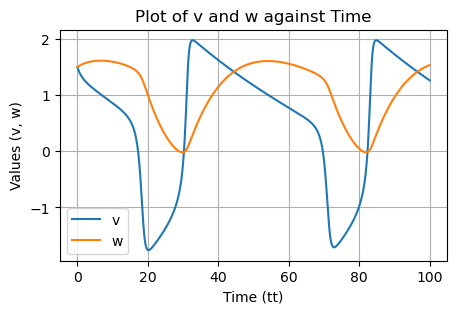

a =  0.28444444444444444


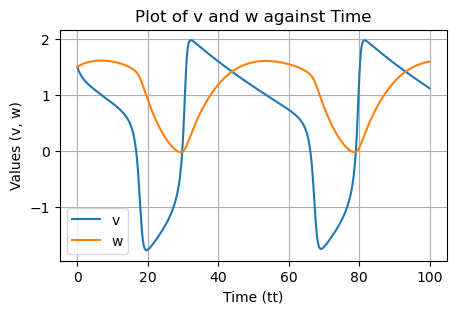

a =  0.2872222222222222


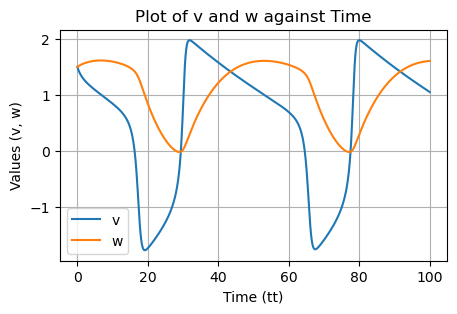

a =  0.29


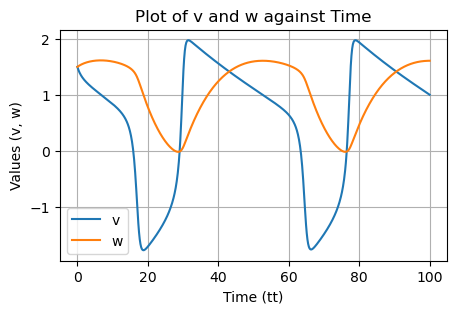

In [7]:
a = np.linspace(0.265,0.29,NT)

for i in range(1,NT+1):
	print("a = ",a[i-1])
	x_temp = traj_computation(epsilon,a[i-1],b,Iext,theta,T,N,v0,w0,1)

# b

Il parametro b influenza la presenza di cicli limite nell'intervallo (0, 1.0643434343434344) con questa configurazione di parametri

b =  0.1


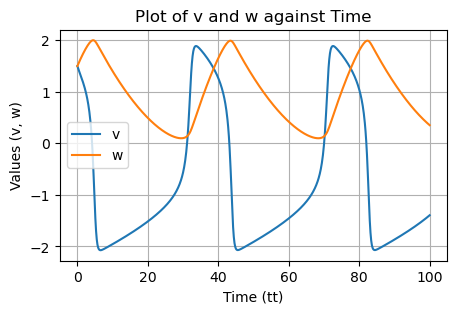

b =  0.24444444444444444


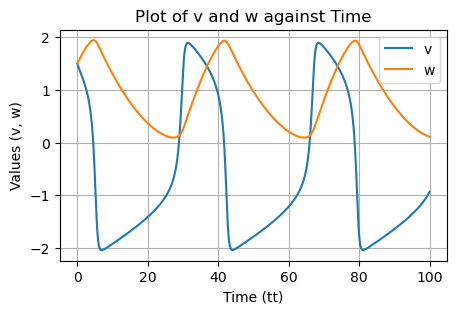

b =  0.38888888888888884


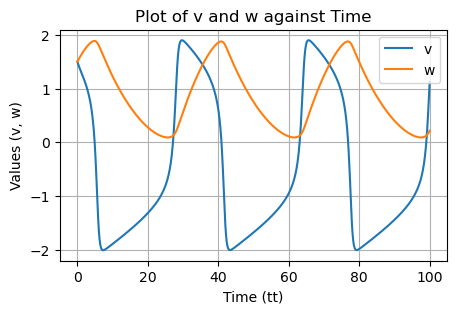

b =  0.5333333333333333


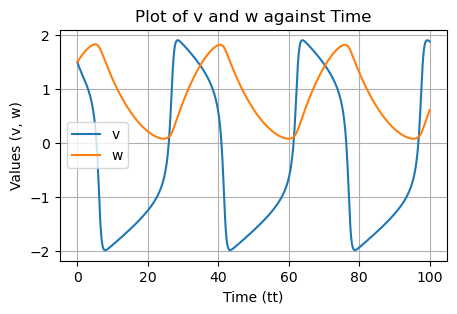

b =  0.6777777777777777


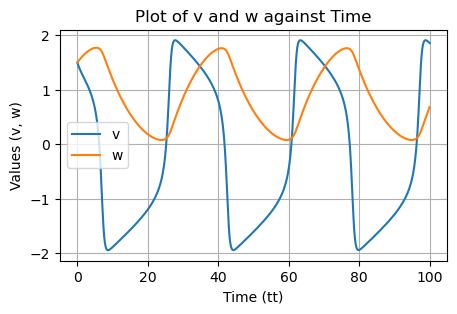

b =  0.8222222222222221


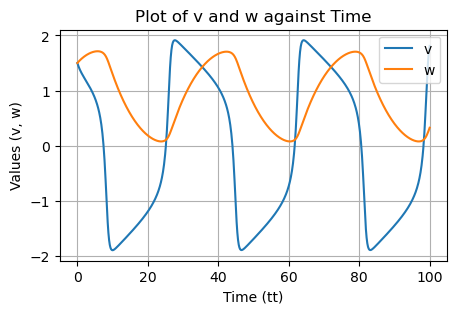

b =  0.9666666666666666


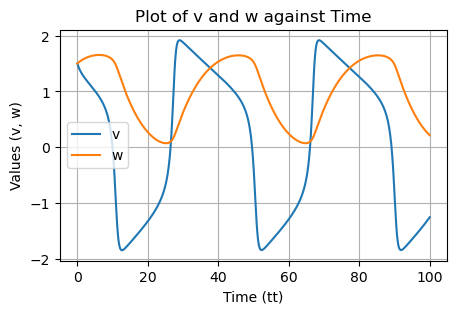

b =  1.1111111111111112


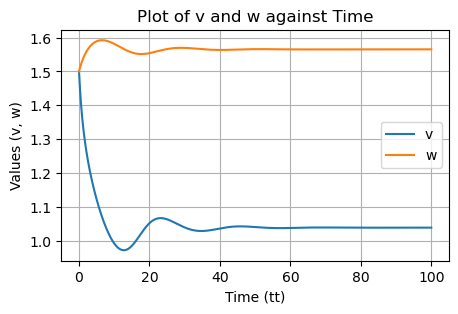

b =  1.2555555555555555


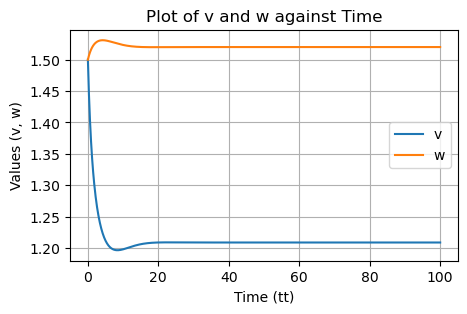

b =  1.4


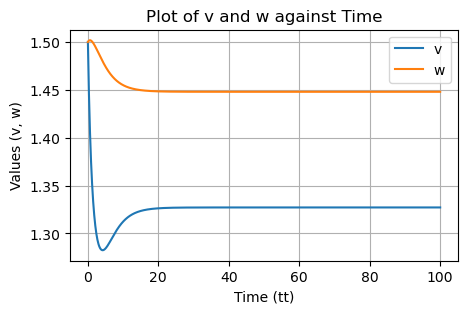

In [8]:
theta = 1
T     = 100
N     = 1000
dt    = T/N
NT    = 10

epsilon = 1/12.5
a       = 0.7
Iext    = 0.9
v0      = 1.5
w0      = v0

b = np.linspace(0.1,1.4,NT)

for i in range(1,NT+1):
	print("b = ",b[i-1])
	x_temp = traj_computation(epsilon,a,b[i-1],Iext,theta,T,N,v0,w0,1)

Anche per il parametro b si verifica lo stesso fenomeno del parametro a nell'intervallo (1.0643434343434344, 1.0694949494949495)

b =  1.05


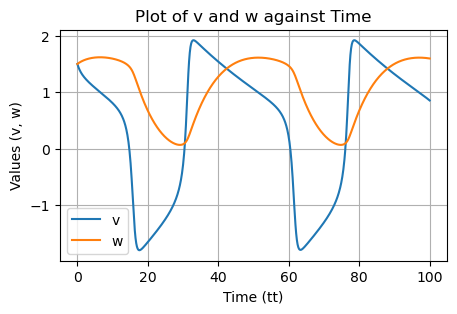

b =  1.0522222222222222


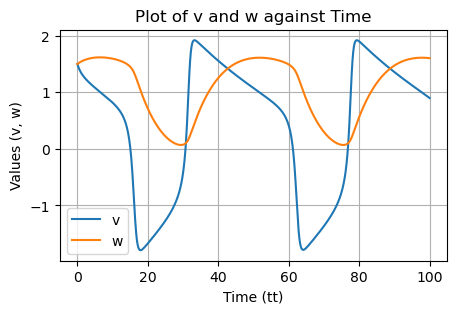

b =  1.0544444444444445


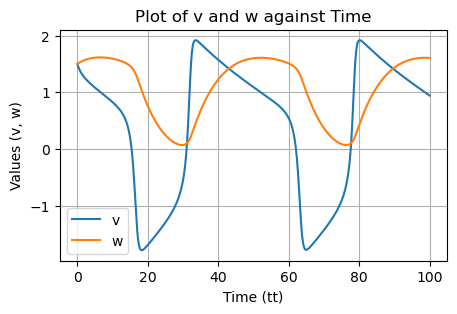

b =  1.0566666666666666


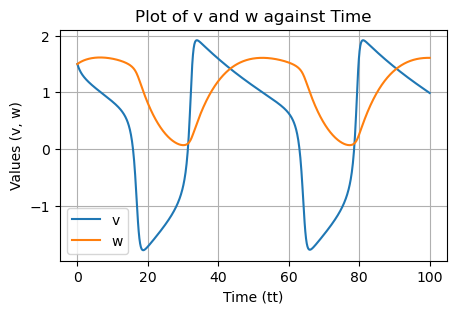

b =  1.058888888888889


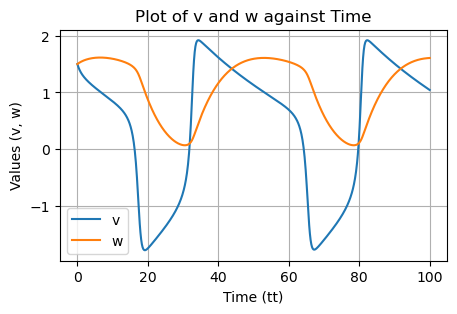

b =  1.0611111111111111


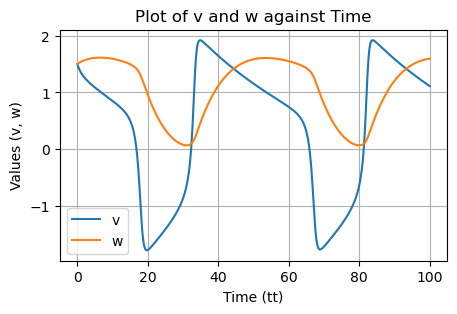

b =  1.0633333333333335


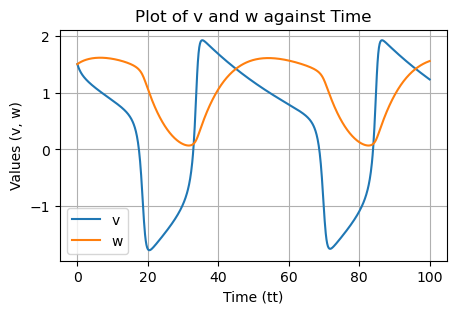

b =  1.0655555555555556


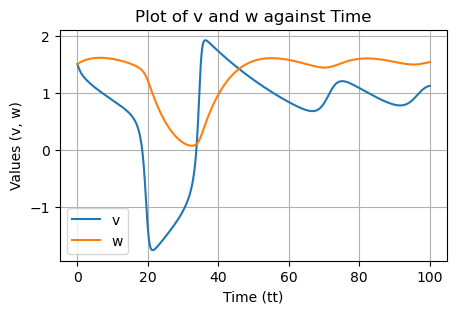

b =  1.067777777777778


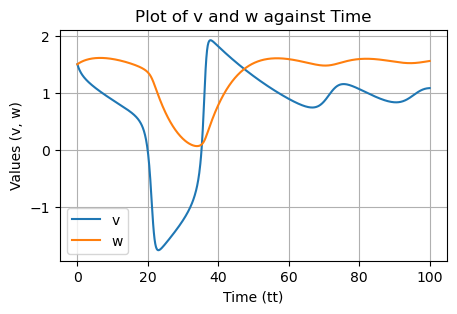

b =  1.07


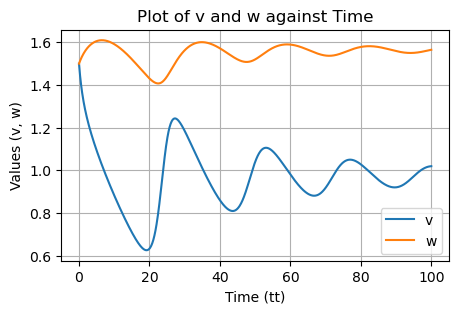

In [9]:
b = np.linspace(1.05,1.07,NT)

for i in range(1,NT+1):
	print("b = ",b[i-1])
	x_temp = traj_computation(epsilon,a,b[i-1],Iext,theta,T,N,v0,w0,1)

# Iext

Il valore di Iext causa la presenza di cicli limite nell'intervallo (0.32654041424344454, 1.426842105263158)

Iext =  0.2


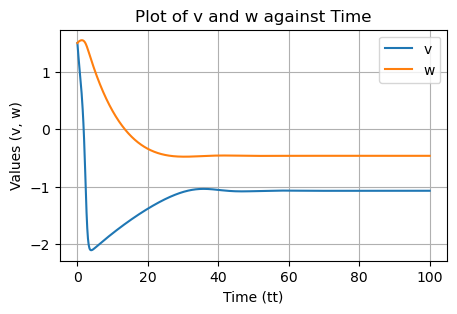

Iext =  0.2947368421052632


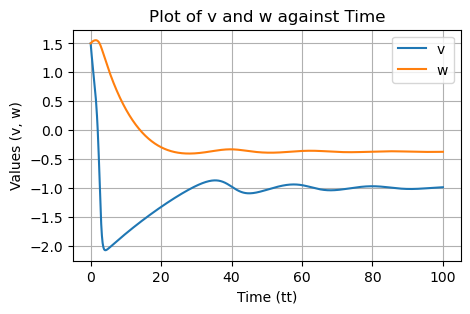

Iext =  0.3894736842105263


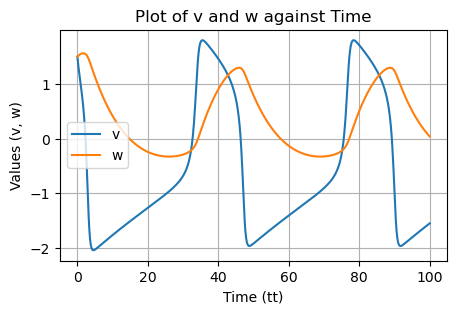

Iext =  0.4842105263157895


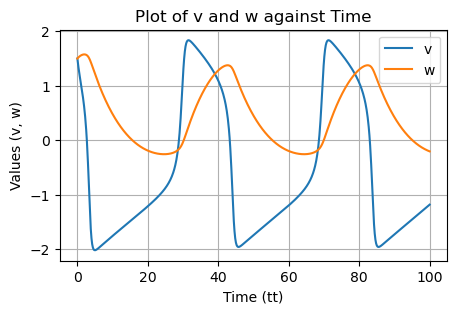

Iext =  0.5789473684210527


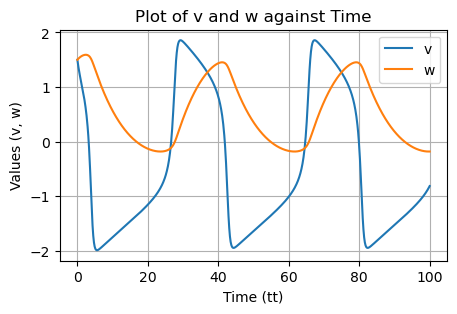

Iext =  0.6736842105263159


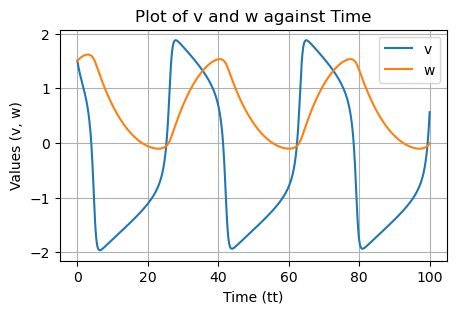

Iext =  0.7684210526315789


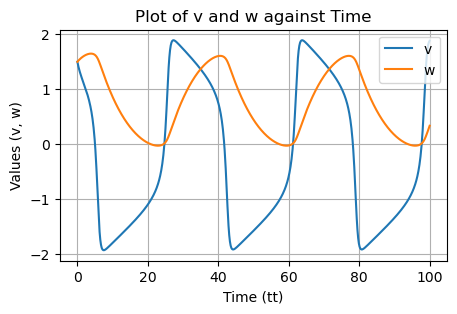

Iext =  0.8631578947368421


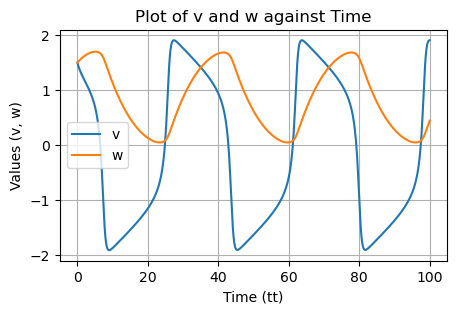

Iext =  0.9578947368421054


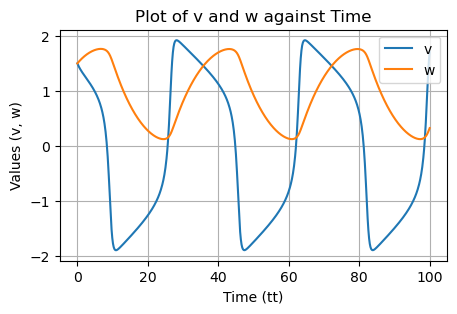

Iext =  1.0526315789473684


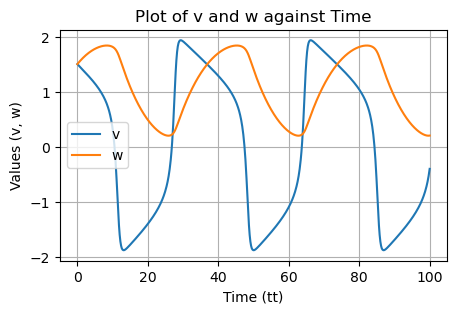

Iext =  1.1473684210526316


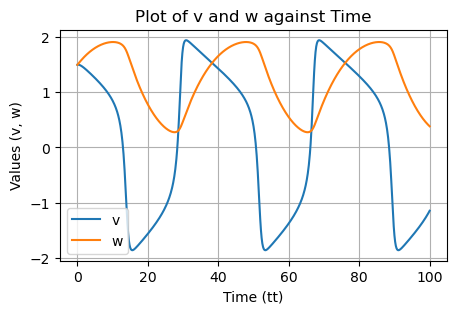

Iext =  1.2421052631578948


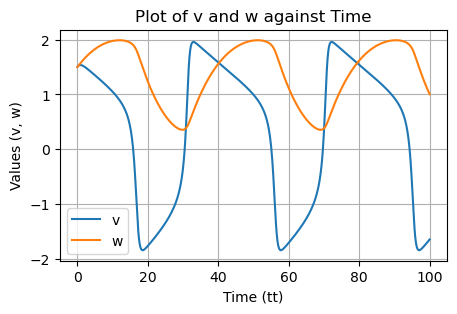

Iext =  1.3368421052631578


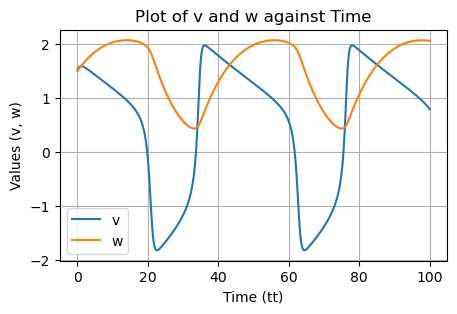

Iext =  1.431578947368421


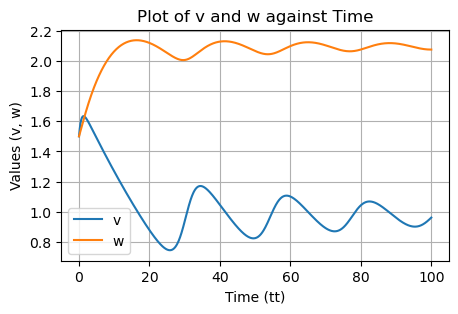

Iext =  1.5263157894736843


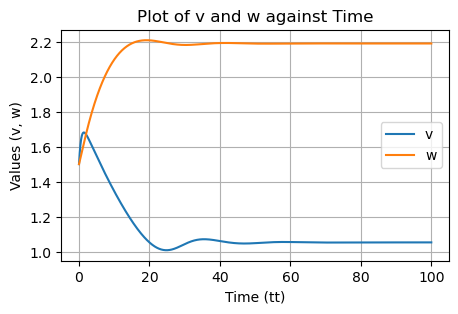

Iext =  1.6210526315789473


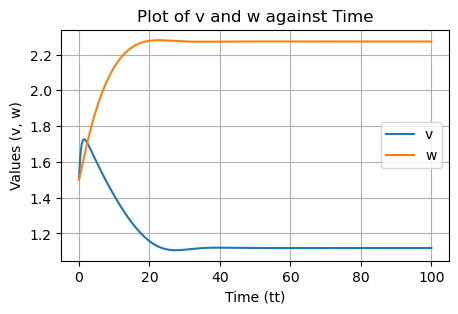

Iext =  1.7157894736842105


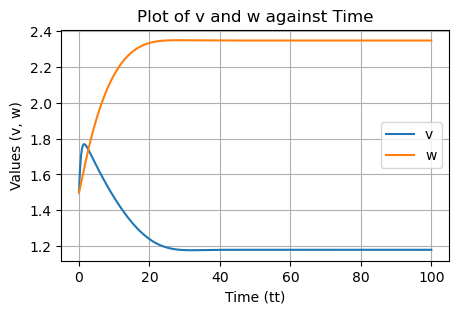

Iext =  1.8105263157894738


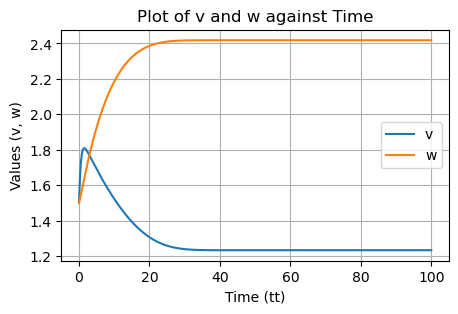

Iext =  1.9052631578947368


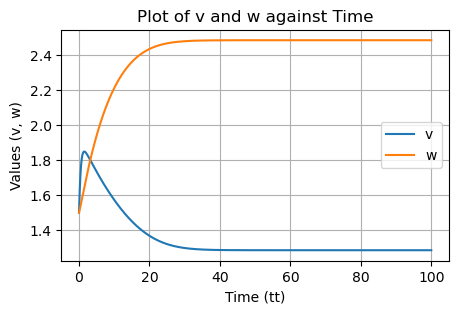

Iext =  2.0


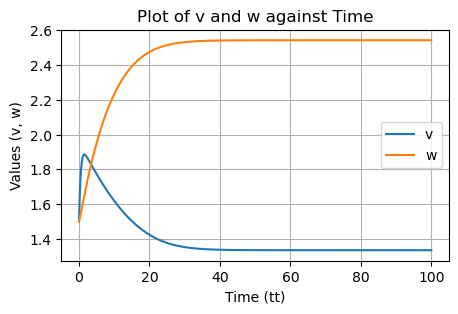

In [10]:
theta = 1
T     = 100
N     = 1000
dt    = T/N
NT    = 20

epsilon = 1/12.5
a       = 0.7
b       = 0.8
v0      = 1.5
w0      = v0

Iext = np.linspace(0.2,2,NT)

for i in range(1,NT+1):
	print("Iext = ",Iext[i-1])
	x_temp = traj_computation(epsilon,a,b,Iext[i-1],theta,T,N,v0,w0,1)

# Trajectories examples

Epsilon =  0.723847968664846 , a =  0.22162432052513864 , b =  0.6860152220678698 , Iext =  0.60133730569743


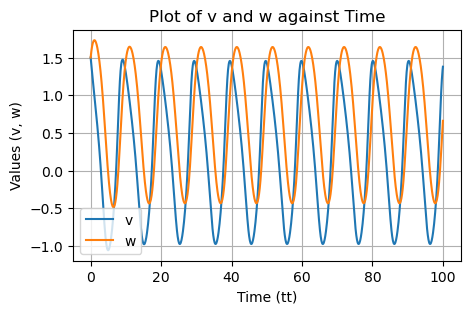

Epsilon =  1.0681336187970298 , a =  0.9167621728224995 , b =  0.16547888028094726 , Iext =  0.6796710674864925


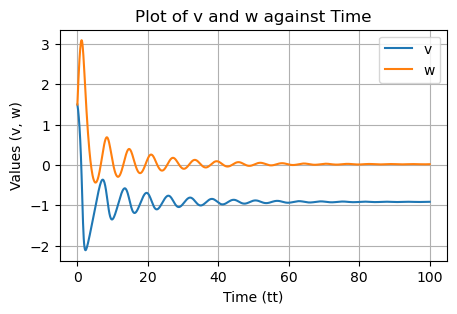

Epsilon =  0.7435193657288055 , a =  0.15567370434165204 , b =  0.44533899536569654 , Iext =  0.3199684337753991


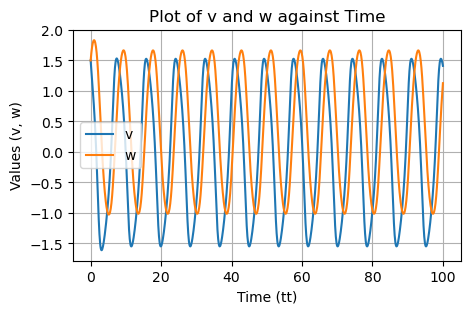

Epsilon =  0.557163094377071 , a =  0.3000666539820396 , b =  0.12319540370700001 , Iext =  0.4091030853509605


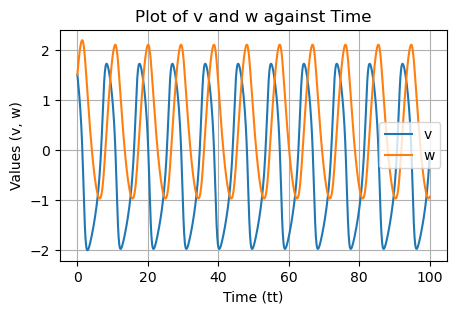

Epsilon =  0.7251807313952353 , a =  0.7646189811514497 , b =  0.34471991840551525 , Iext =  1.2481507680505584


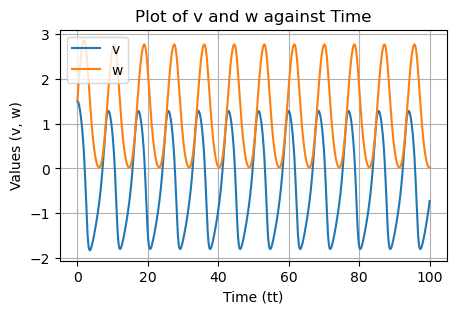

Epsilon =  0.8948671436703696 , a =  0.9050098144613113 , b =  0.8018391306958208 , Iext =  0.7678420444821366


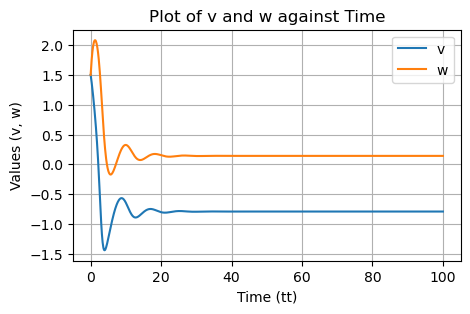

Epsilon =  0.7210490323807927 , a =  0.8449051926949992 , b =  0.6832839449941687 , Iext =  0.20569612545904878


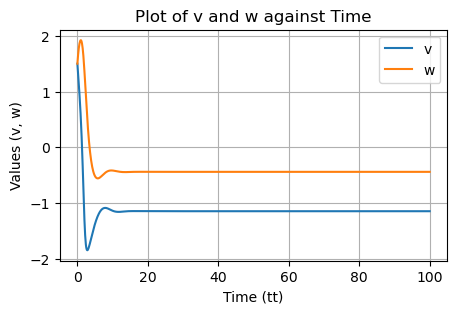

Epsilon =  0.9618206187874072 , a =  0.13090866593279676 , b =  0.6921389873066656 , Iext =  0.7328650563816816


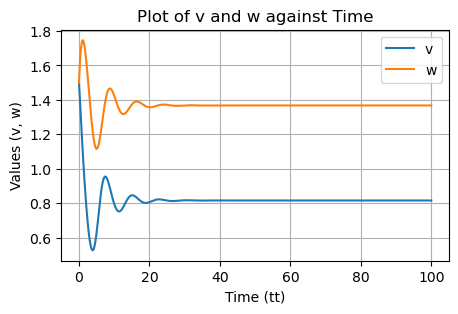

Epsilon =  0.28163585507890004 , a =  0.4867226744653297 , b =  0.28353031964812947 , Iext =  0.36384681162330057


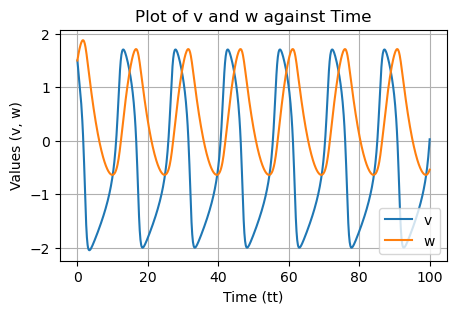

Epsilon =  0.5106718848552728 , a =  0.1770099684622451 , b =  0.5133065870522691 , Iext =  1.192886321558081


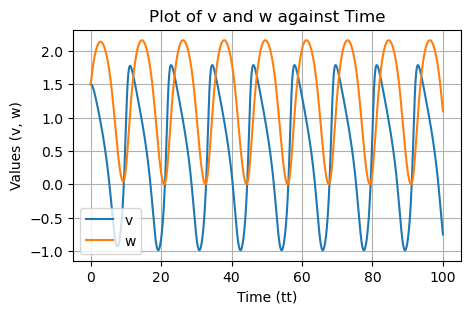

Epsilon =  1.1267178101827078 , a =  0.30050158739194577 , b =  0.8094991787323733 , Iext =  1.2383036924900392


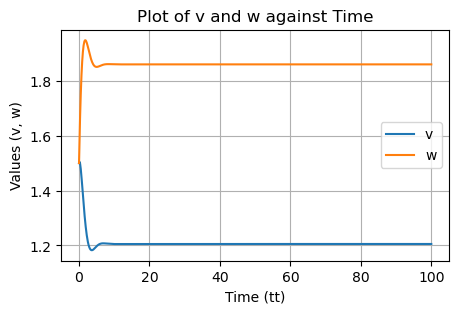

Epsilon =  0.29441054307768805 , a =  0.9773751049991755 , b =  0.22480404170200563 , Iext =  0.24773583425036258


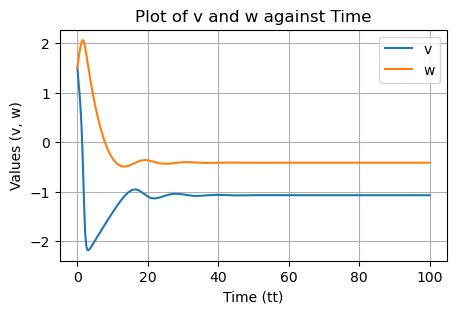

Epsilon =  0.1904730243760087 , a =  0.7842966880554415 , b =  0.8392198673575216 , Iext =  0.48701425502156886


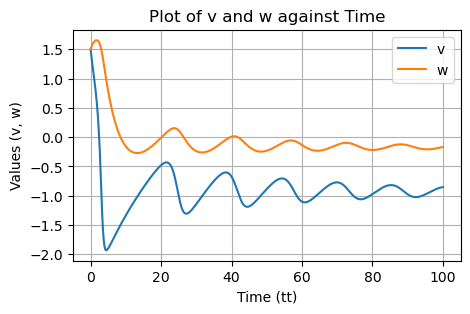

Epsilon =  0.43572595906882167 , a =  0.4986015305361946 , b =  0.4112701455410259 , Iext =  0.9907881155114215


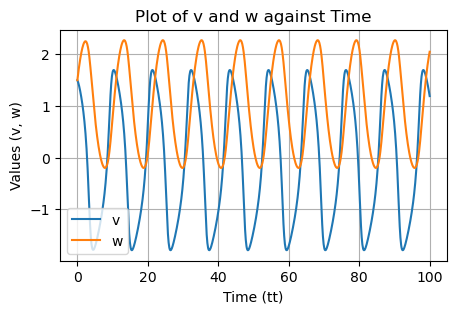

Epsilon =  0.9366688184272574 , a =  0.44166201105880487 , b =  0.38524025350545565 , Iext =  1.2183331121492311


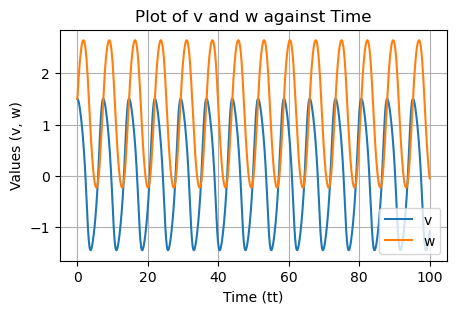

Epsilon =  0.3854441482357094 , a =  0.6402373430060551 , b =  0.1507000027064599 , Iext =  1.3278950427313567


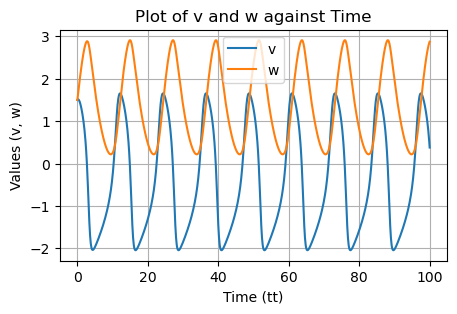

Epsilon =  0.9504642321060846 , a =  0.1829267145417303 , b =  0.8105272084306034 , Iext =  0.7899733241515521


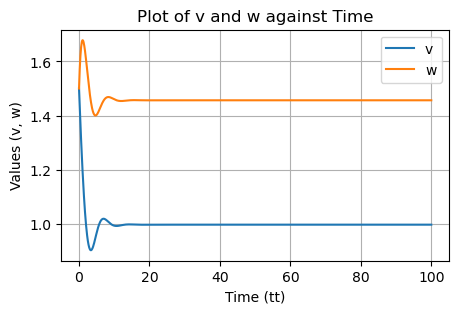

Epsilon =  0.6227295108214601 , a =  0.21461749698731789 , b =  0.278113330208576 , Iext =  0.5859134861317573


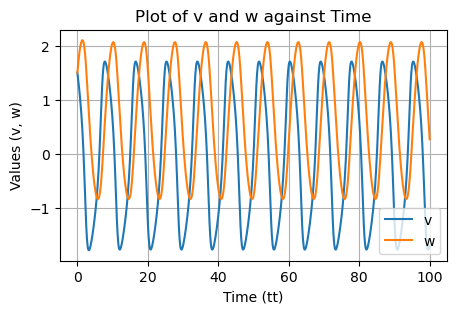

Epsilon =  0.2859934224494457 , a =  0.41546385702502964 , b =  0.6670051891814677 , Iext =  0.7728445601353608


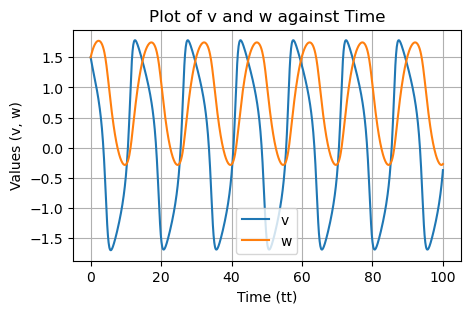

Epsilon =  0.3182657074432087 , a =  0.9144165931178236 , b =  0.6142009115749106 , Iext =  1.3768997324180232


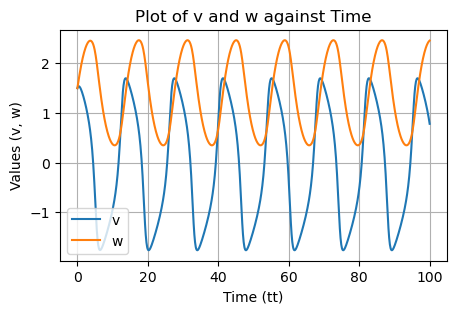

Epsilon =  0.06739423127553552 , a =  0.6818821621074692 , b =  0.31092827176773974 , Iext =  1.2348349147170579


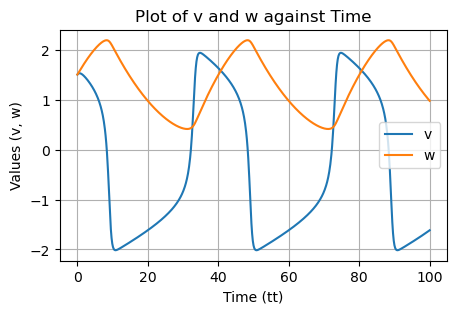

Epsilon =  0.8202932590318949 , a =  0.49024706390485295 , b =  0.1307240503672677 , Iext =  1.3662779799486342


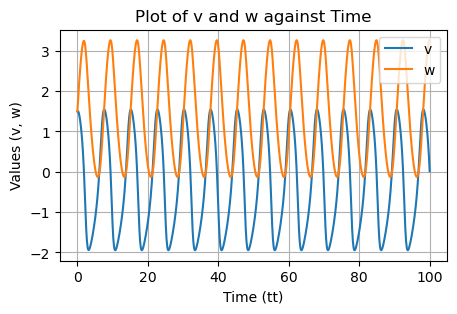

Epsilon =  0.1437365785840889 , a =  0.937431826258686 , b =  0.5757348048870666 , Iext =  1.158587023040188


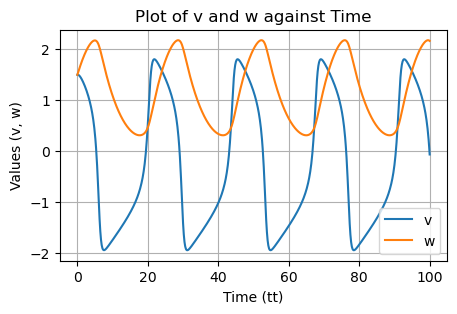

Epsilon =  1.0094196709174221 , a =  0.6700423867231305 , b =  0.3502753527896487 , Iext =  0.4227994322480247


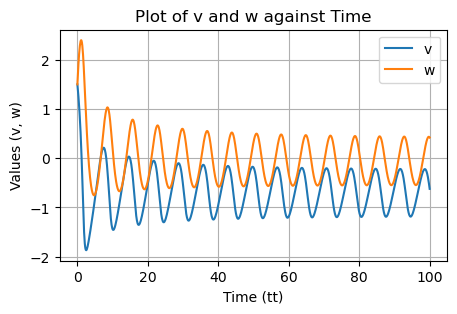

Epsilon =  0.9683740233724325 , a =  0.6495647648163353 , b =  0.9646295324954295 , Iext =  0.5244953594535469


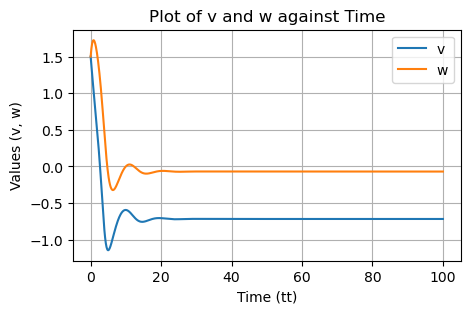

Epsilon =  0.2719034467699203 , a =  0.8614157280395315 , b =  0.5580881277273659 , Iext =  0.20071809513895864


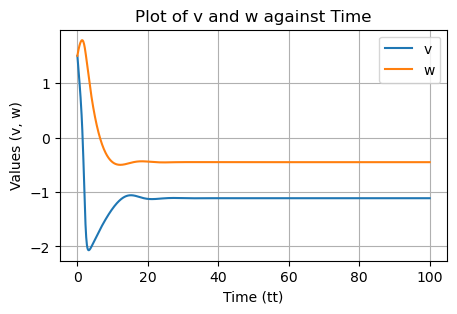

Epsilon =  0.420887824659734 , a =  0.9587990725246454 , b =  0.29619125403688595 , Iext =  0.7835120005467926


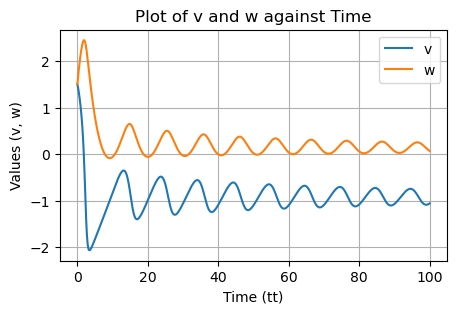

Epsilon =  0.4307602730276682 , a =  0.14673235558566033 , b =  0.8878061949679061 , Iext =  0.8372738280375371


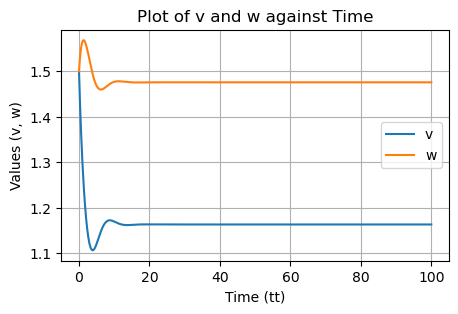

Epsilon =  0.346837920045966 , a =  0.8524580597295767 , b =  0.311479282161335 , Iext =  0.7021649320334942


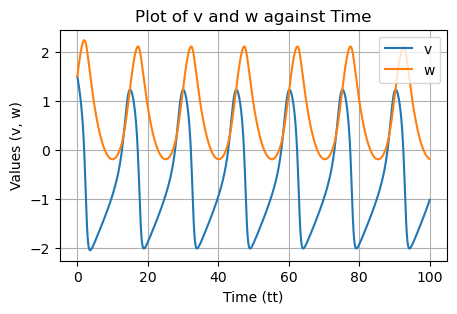

Epsilon =  0.487181814483634 , a =  0.38954056684022653 , b =  0.5638091513193947 , Iext =  0.4956140120496172


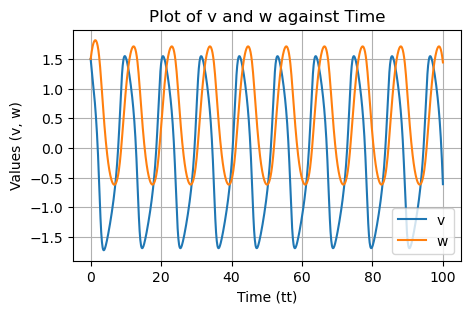

Epsilon =  0.4708191478457271 , a =  0.48697086693794156 , b =  0.2352303993338936 , Iext =  0.573439383384161


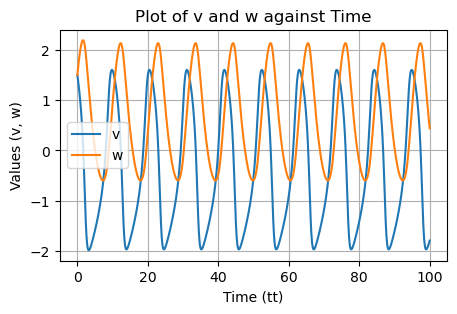

Epsilon =  1.13464897112998 , a =  0.512079808902327 , b =  0.5543062908619903 , Iext =  1.2363175388357917


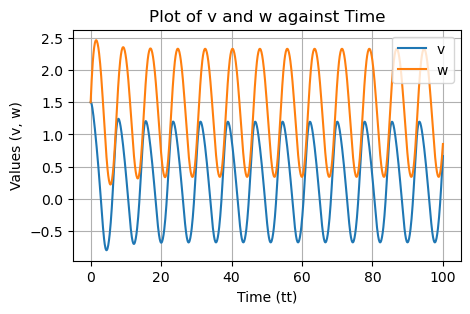

Epsilon =  0.13874365218457932 , a =  0.16554652478895743 , b =  0.539804489203957 , Iext =  0.9639644128791114


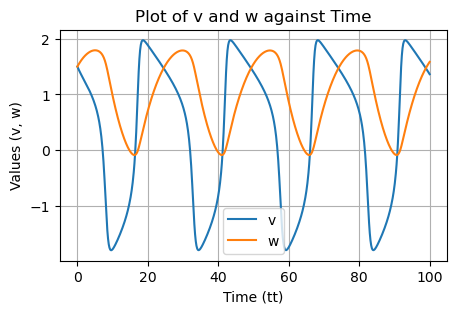

Epsilon =  0.800374350254481 , a =  0.87368728982897 , b =  0.680149538003388 , Iext =  0.5505964596583085


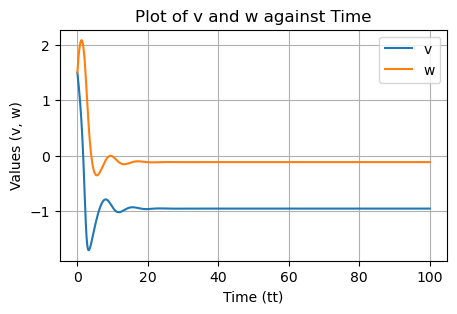

Epsilon =  0.9440075736400309 , a =  0.5625144304031687 , b =  0.941523173357167 , Iext =  1.1533009068154867


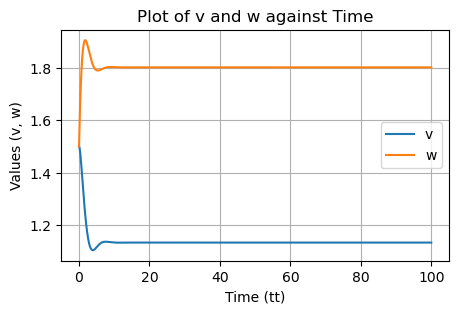

Epsilon =  0.05433854006196994 , a =  0.6501860550882319 , b =  0.21321378630652607 , Iext =  0.9118124577524624


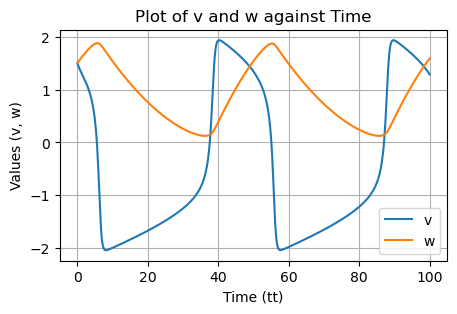

Epsilon =  0.34719866455508785 , a =  0.4822465158679349 , b =  0.7661160939269 , Iext =  0.2386352880521838


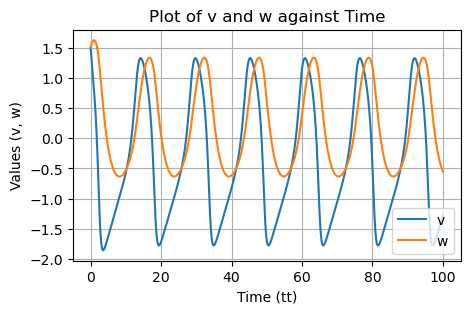

Epsilon =  0.0037181275714199377 , a =  0.5307843319479749 , b =  0.8681039769532424 , Iext =  0.6304105392682091


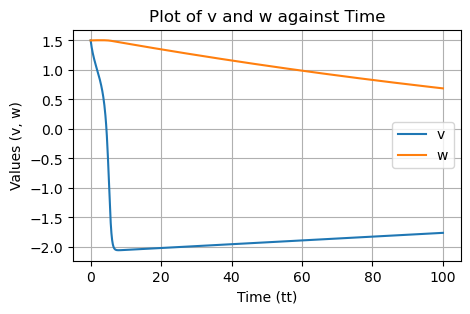

Epsilon =  0.1924570854727214 , a =  0.6182269074571798 , b =  0.5744150217285044 , Iext =  1.0552405462761498


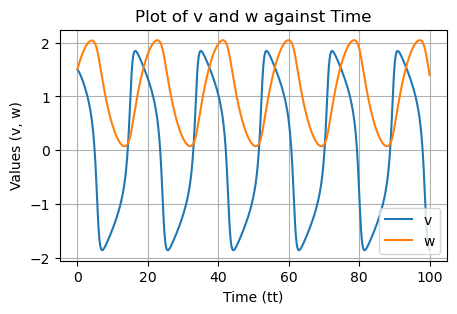

Epsilon =  0.7161127411686613 , a =  0.8130505824974279 , b =  0.19129799740403625 , Iext =  0.4209093168300908


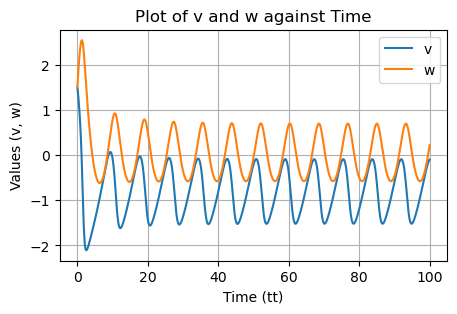

Epsilon =  0.21075886559773319 , a =  0.11269658401070803 , b =  0.6410896821885339 , Iext =  0.5775202644945471


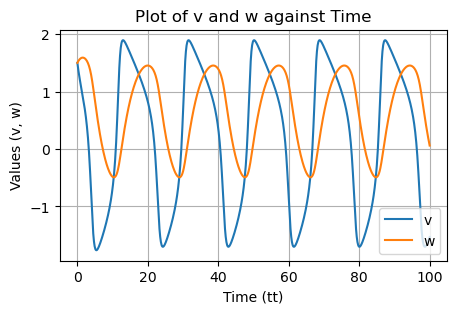

Epsilon =  1.139862789763727 , a =  0.8505302198869412 , b =  0.4131809545004299 , Iext =  0.8229572742330451


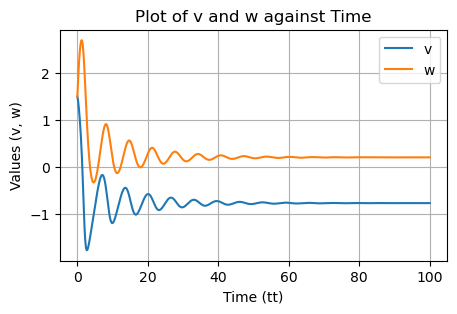

Epsilon =  0.9936221298744983 , a =  0.5077701407781061 , b =  0.9640867302027284 , Iext =  1.3703121095680084


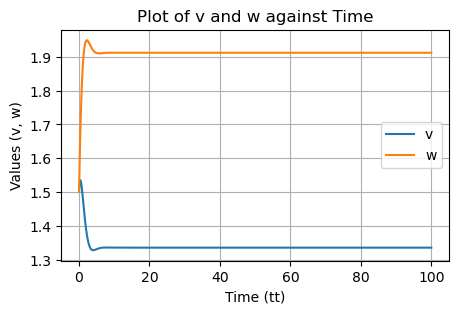

Epsilon =  0.07305171254617061 , a =  0.6490093953083726 , b =  0.7965713923279439 , Iext =  1.2684607225041462


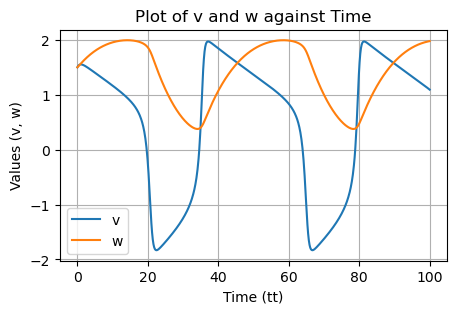

Epsilon =  0.930012204294874 , a =  0.722861487116208 , b =  0.9114589903578642 , Iext =  1.325170786243572


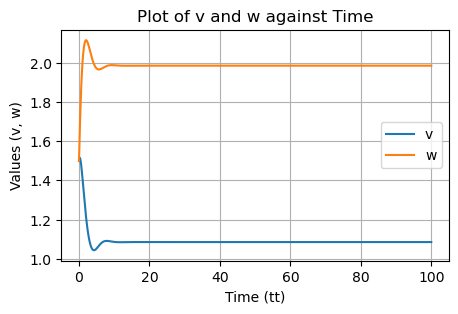

Epsilon =  1.0342166079087933 , a =  0.20922446026932617 , b =  0.6868271910758985 , Iext =  0.8389148877051478


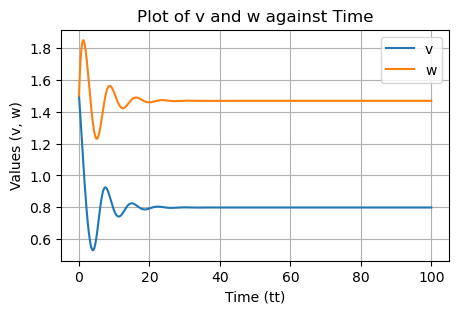

Epsilon =  0.7716228536482177 , a =  0.573963632696713 , b =  0.78889024475654 , Iext =  0.7880124580960572


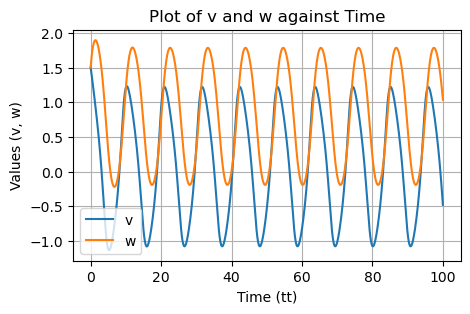

Epsilon =  0.09922650305945026 , a =  0.7353303767264183 , b =  0.608265361884137 , Iext =  1.049600682900311


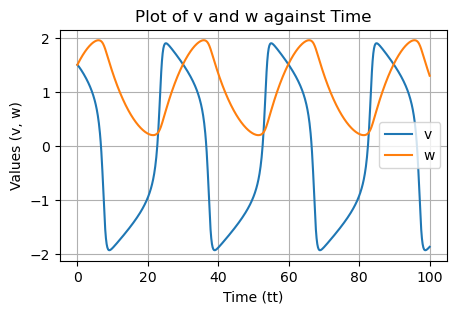

Epsilon =  0.4612385688467888 , a =  0.8727404699729012 , b =  0.4187372857433106 , Iext =  0.3272378971862746


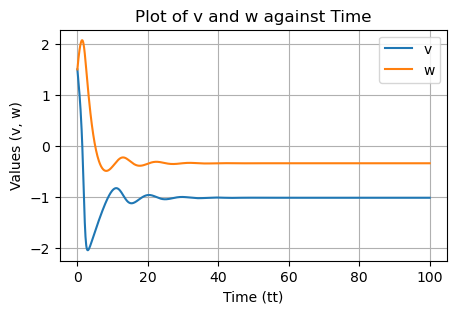

Epsilon =  0.4315741174534319 , a =  0.7461066959186067 , b =  0.5308073992083386 , Iext =  0.2451708956609332


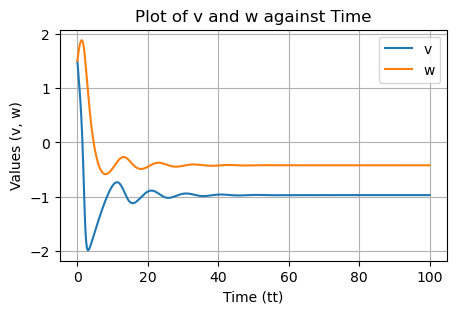

Epsilon =  1.162798039381847 , a =  0.1379121217589569 , b =  0.14802225380919742 , Iext =  1.1462794312125504


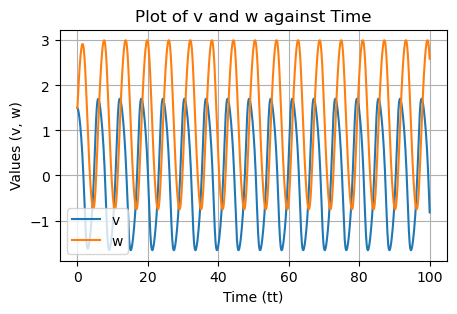

Epsilon =  0.4501375089870811 , a =  0.7219883370351553 , b =  0.2792228631630497 , Iext =  0.7494609176103455


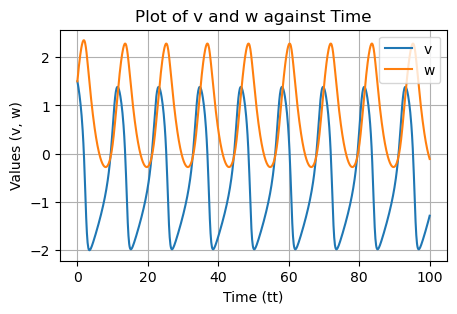

Epsilon =  0.22356914274249604 , a =  0.19538337409310297 , b =  0.9405466477099181 , Iext =  0.9900179425995237


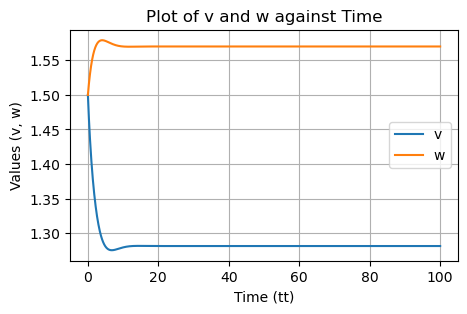

Epsilon =  1.1768103455826875 , a =  0.1693475275315926 , b =  0.7510647460241694 , Iext =  0.38483722821420263


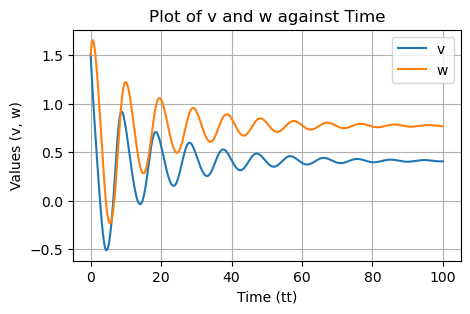

Epsilon =  0.8842525779808922 , a =  0.7169282132169189 , b =  0.4657022500177107 , Iext =  0.5709757643109986


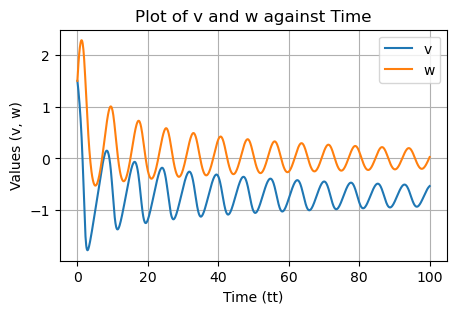

Epsilon =  0.10582128895144724 , a =  0.6856796055369526 , b =  0.2405737920991924 , Iext =  0.9722414576513243


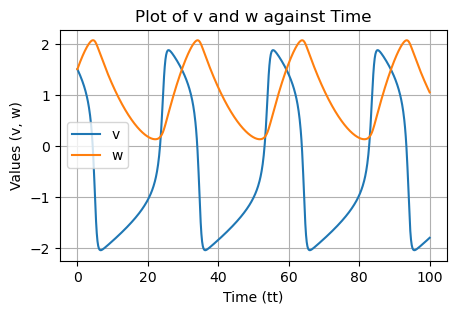

Epsilon =  0.2514402695405354 , a =  0.7904767652691046 , b =  0.9521186831906626 , Iext =  0.2100458823123649


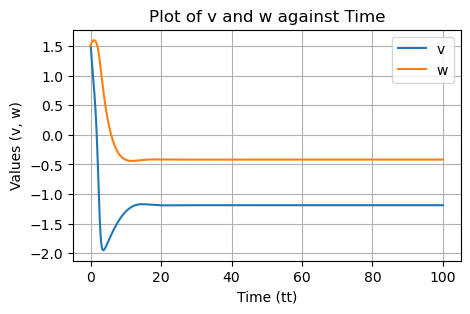

Epsilon =  0.17987712189021968 , a =  0.658378481394726 , b =  0.21662973292037385 , Iext =  0.9427667500875503


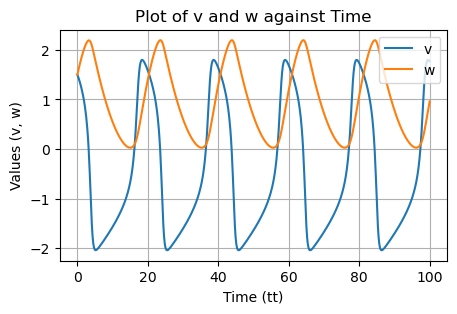

Epsilon =  0.6246367598953272 , a =  0.6558379687651833 , b =  0.3943428957751359 , Iext =  0.7092741361651338


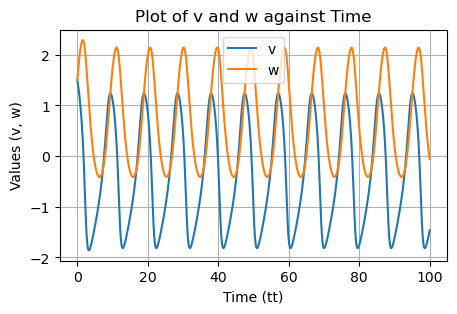

Epsilon =  0.3947162973593283 , a =  0.394096935332539 , b =  0.6210248200265212 , Iext =  0.47663558632643116


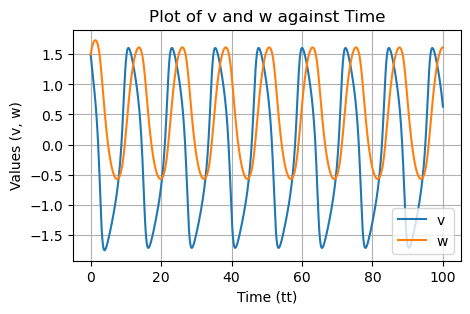

Epsilon =  0.8673080328127677 , a =  0.3580057415246375 , b =  0.40318004864283263 , Iext =  0.3899808362133703


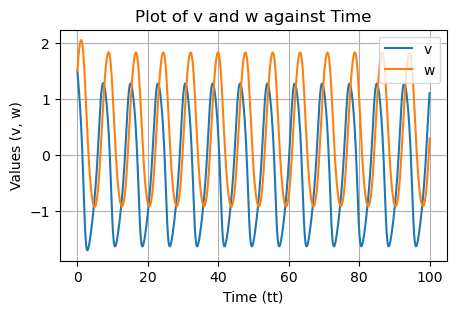

Epsilon =  0.3760043707022367 , a =  0.35757607585935325 , b =  0.4191583350118996 , Iext =  0.29154086855547867


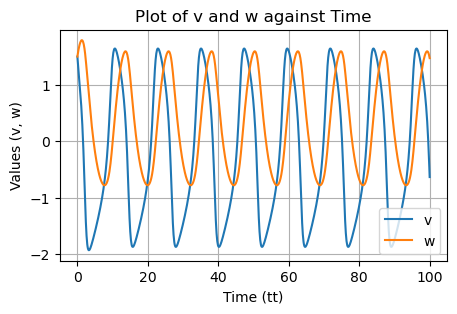

Epsilon =  1.077181216348183 , a =  0.6004484868054691 , b =  0.7014524641889305 , Iext =  0.9811718951317507


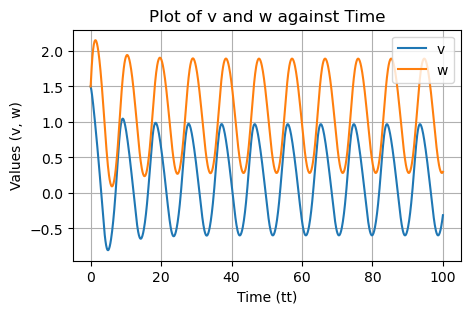

Epsilon =  1.133708931972741 , a =  0.4906619143015222 , b =  0.32017046253286197 , Iext =  0.3287674970557941


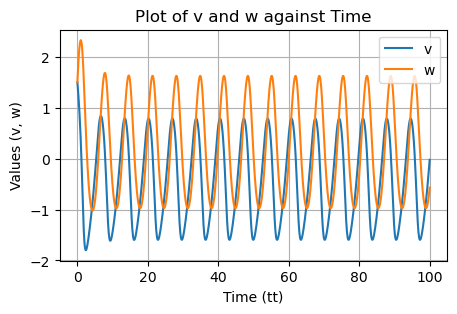

Epsilon =  0.34398900022263257 , a =  0.3581580107146983 , b =  0.4768974694440731 , Iext =  0.3787578333327595


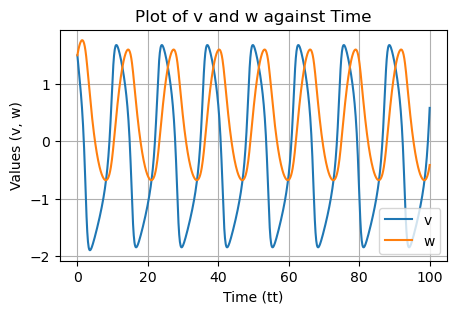

Epsilon =  1.1124083685573505 , a =  0.4233185422575424 , b =  0.8792553994407108 , Iext =  1.0756471898776723


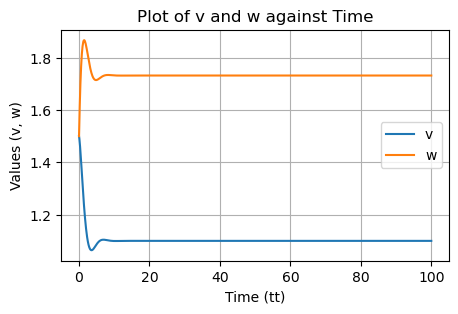

Epsilon =  1.0157224220764542 , a =  0.24128725258052755 , b =  0.5341538898669385 , Iext =  0.8840248262506014


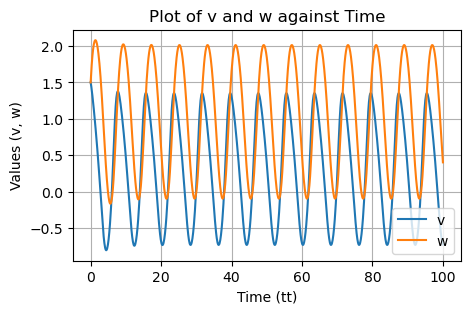

Epsilon =  1.0920990697059796 , a =  0.6508052376880814 , b =  0.7646656106008126 , Iext =  1.2810240478164647


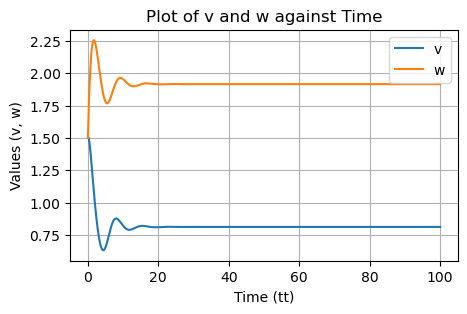

Epsilon =  0.42962592110676284 , a =  0.26392613674254894 , b =  0.4998625476890949 , Iext =  1.1503124622291534


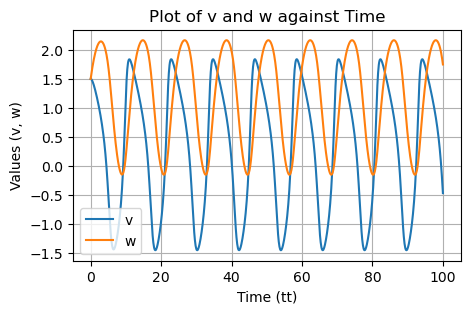

Epsilon =  0.06362370596259459 , a =  0.840107412257043 , b =  0.20296263764040556 , Iext =  1.1282733148153268


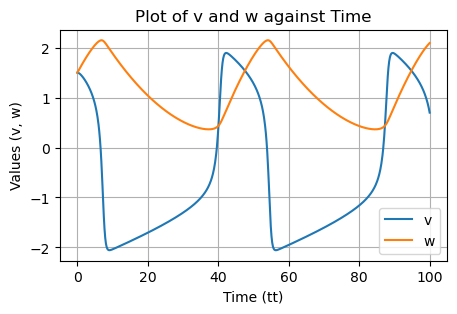

Epsilon =  0.273069573591743 , a =  0.5369194420954722 , b =  0.5721221505086843 , Iext =  0.7087149502555867


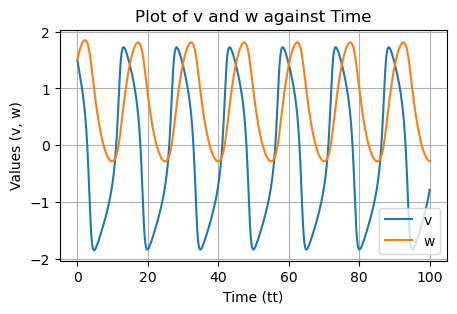

Epsilon =  0.7200154759844194 , a =  0.8308708855991944 , b =  0.9515706171309687 , Iext =  0.5634795250498452


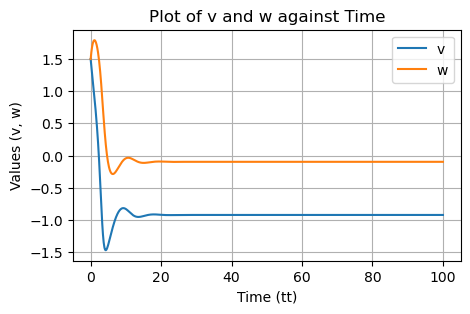

Epsilon =  0.6590409806911774 , a =  0.8088444202731558 , b =  0.2908338217512111 , Iext =  0.8759238906824482


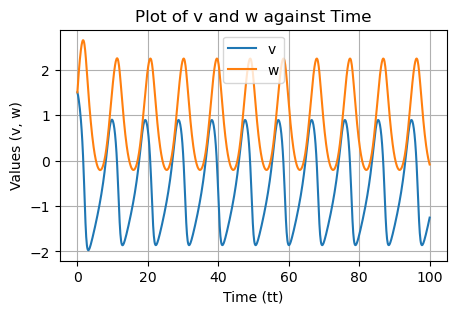

Epsilon =  1.199608374452286 , a =  0.19386456424011575 , b =  0.3296907870873178 , Iext =  1.1625655799977614


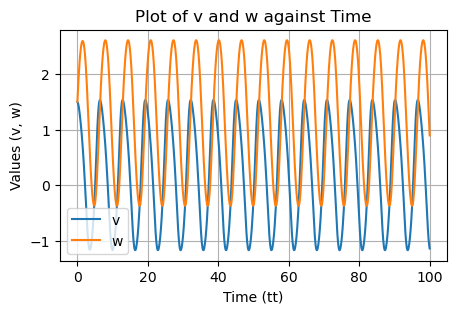

Epsilon =  0.9913707632705614 , a =  0.3971490495654523 , b =  0.9797107696469702 , Iext =  1.2315815896404199


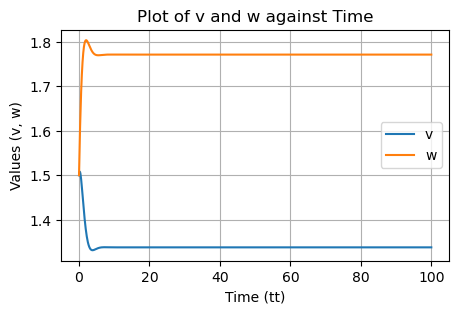

Epsilon =  0.12879420847697357 , a =  0.7137318589762834 , b =  0.34828933053497657 , Iext =  0.7364069793523638


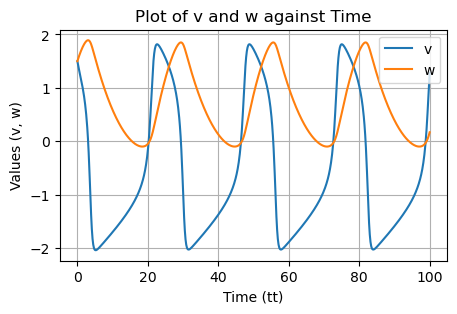

Epsilon =  0.456286060471341 , a =  0.9108102119095934 , b =  0.954471216447117 , Iext =  0.6634943789467111


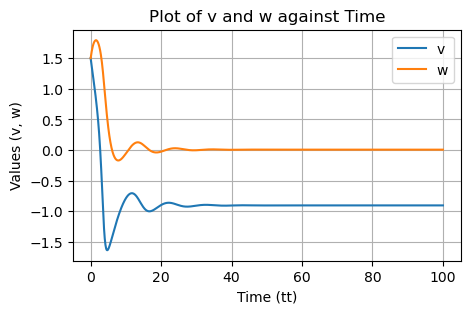

Epsilon =  0.8706478511967052 , a =  0.9055944673671379 , b =  0.6792611849311653 , Iext =  1.3012021377617213


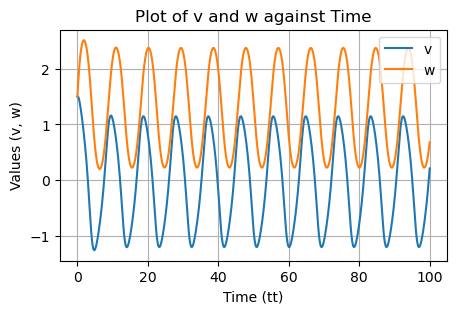

Epsilon =  0.8363769772151716 , a =  0.378212296360232 , b =  0.931089518502882 , Iext =  1.2549093177411834


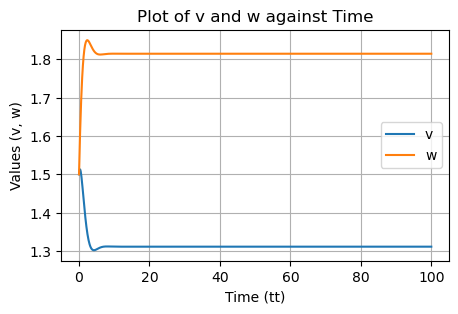

Epsilon =  1.1045005246411725 , a =  0.7059836917649478 , b =  0.4427464212060024 , Iext =  0.7679099061667323


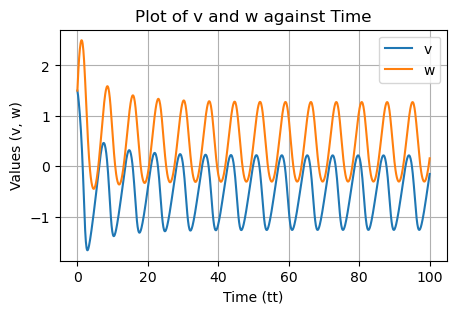

Epsilon =  0.27552000335014726 , a =  0.7479759392081586 , b =  0.2873506598970022 , Iext =  1.2848981780915403


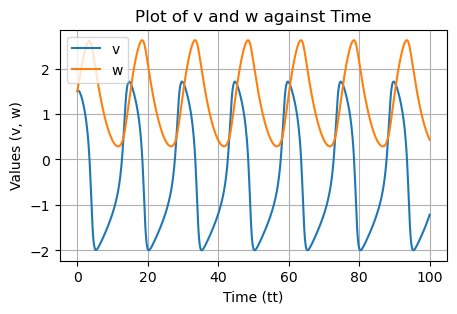

Epsilon =  0.589657349917664 , a =  0.9376752574371962 , b =  0.8918693347928872 , Iext =  0.913039823621361


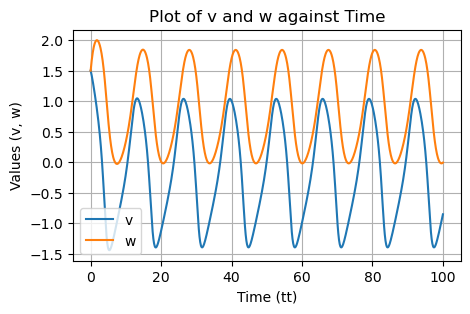

Epsilon =  0.46647941970513096 , a =  0.7417959382179584 , b =  0.21924080165295773 , Iext =  1.2545845234792994


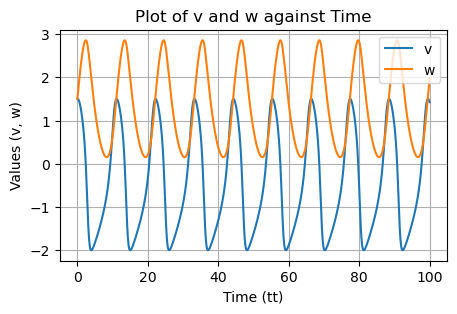

Epsilon =  0.6824260831024627 , a =  0.5438415717285262 , b =  0.4453455502079645 , Iext =  1.0200376799553568


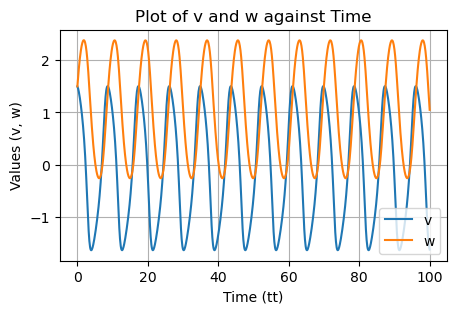

Epsilon =  1.0623440042098344 , a =  0.9895670798458858 , b =  0.7642647148345636 , Iext =  0.4723731966201032


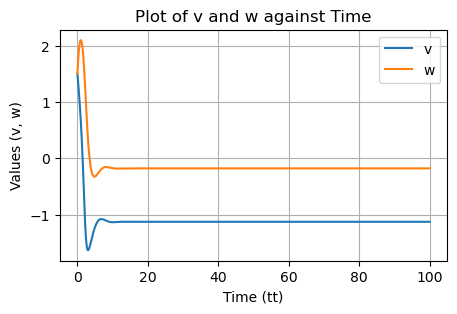

Epsilon =  0.7932158338245096 , a =  0.6044082962489137 , b =  0.4280728132102888 , Iext =  1.1823907481718778


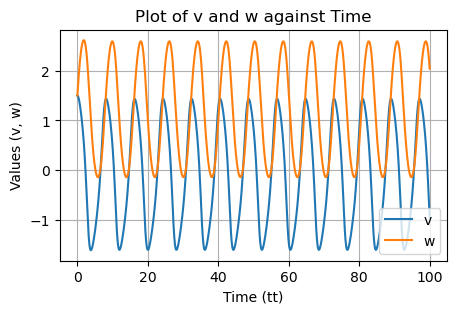

Epsilon =  0.34157492668226164 , a =  0.5032736940521773 , b =  0.6055646238026022 , Iext =  1.0733407309502059


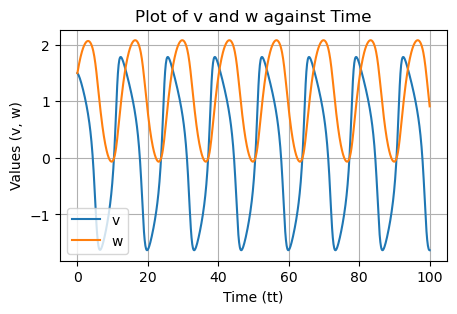

Epsilon =  0.8194777727021748 , a =  0.5122440533014387 , b =  0.5772707011104077 , Iext =  1.2311431404193476


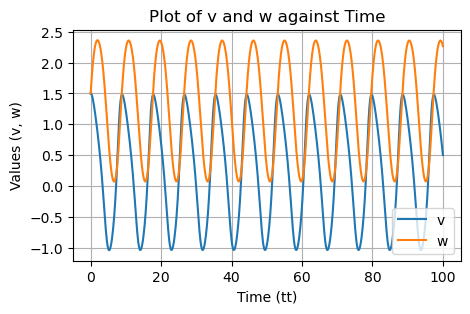

Epsilon =  0.5123791617051032 , a =  0.584268349521377 , b =  0.5373604752333774 , Iext =  0.6443870380288091


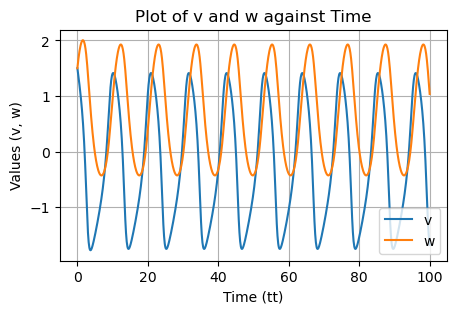

Epsilon =  1.1874395103559507 , a =  0.16828828149647246 , b =  0.206564236519456 , Iext =  0.26988465731030997


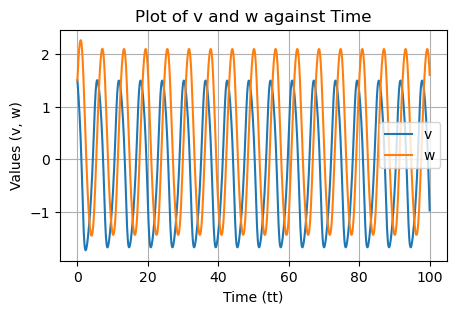

Epsilon =  0.3083563880952848 , a =  0.15264760910302141 , b =  0.24524462618525444 , Iext =  0.9714622600719909


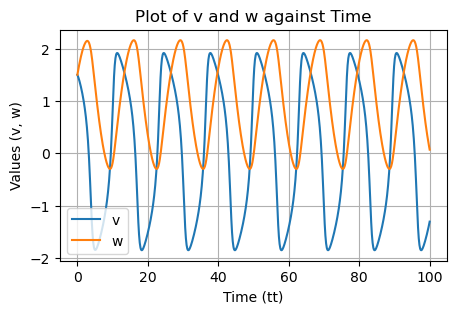

Epsilon =  0.9995215262907527 , a =  0.3579289076393748 , b =  0.5655625114957812 , Iext =  0.5666738587934788


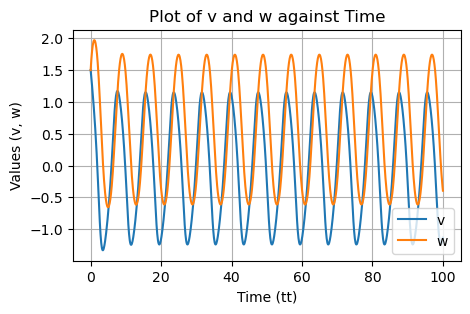

Epsilon =  1.0111675843596917 , a =  0.9587803807915981 , b =  0.5636044944163441 , Iext =  0.8421251360207258


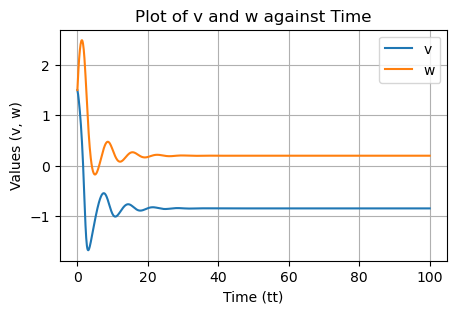

Epsilon =  0.8385731694930243 , a =  0.6975518989885359 , b =  0.5768707598422951 , Iext =  0.8067463397493531


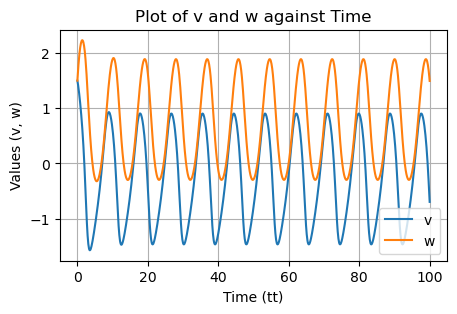

Epsilon =  0.6793378006737106 , a =  0.17597135073505532 , b =  0.9174342476412504 , Iext =  0.24552635066970005


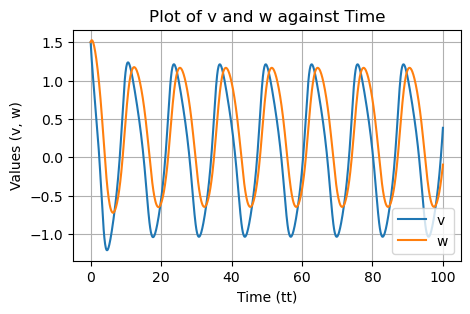

Epsilon =  0.09589303056289666 , a =  0.15554936123045965 , b =  0.4057766304059851 , Iext =  0.9025918255036425


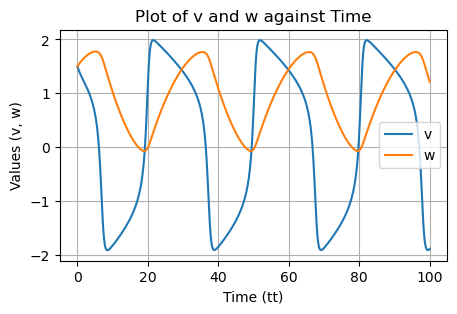

Epsilon =  0.24933792464616944 , a =  0.47485422297173396 , b =  0.25270130036148897 , Iext =  0.8492825801401691


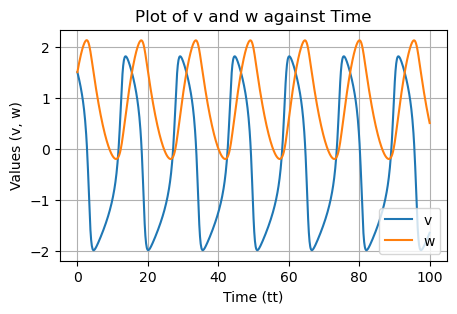

Epsilon =  0.9047058374992937 , a =  0.8373042090719935 , b =  0.639995458181577 , Iext =  1.1803533511538125


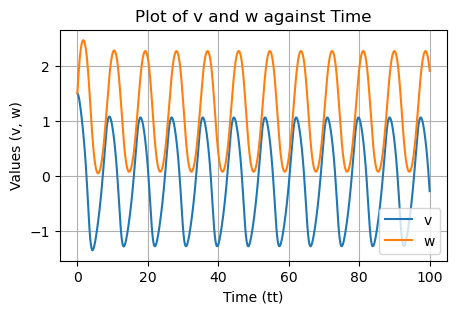

Epsilon =  0.906476022229487 , a =  0.2669110624480733 , b =  0.8981251815414235 , Iext =  0.2949739166058743


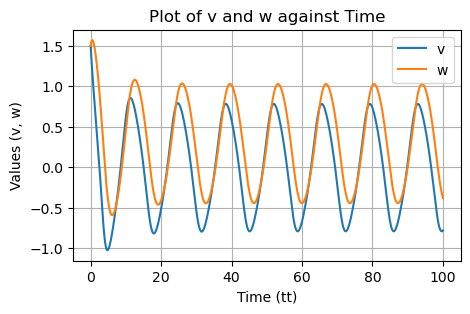

Epsilon =  0.7083699450524336 , a =  0.39211799941565717 , b =  0.49655101928202805 , Iext =  1.311527967679474


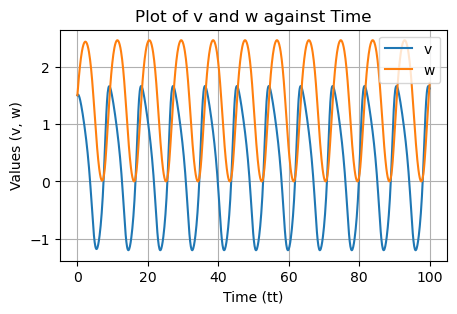

Percentage of limit cycle trajectories:  57.99999999999999 %


In [20]:
theta = 1
T     = 100
N     = 1000
dt    = T/N
NT    = 100

v0      = 1.5
w0      = v0

total_trajectories       = 0
limit_cycle_trajectories = 0

for i in range(1,NT+1):
	epsilon = np.random.uniform(0,1.2)
	a       = np.random.uniform(0.1,1)
	b       = np.random.uniform(0.1,1)
	Iext    = np.random.uniform(0.2,1.4)

	print("Epsilon = ",epsilon,", a = ",a,", b = ",b,", Iext = ",Iext)
	x_temp = traj_computation(epsilon,a,b,Iext,theta,T,N,v0,w0,1)
	total_trajectories += 1
	if check_limit_cycle(x_temp):
		limit_cycle_trajectories += 1

print("Percentage of limit cycle trajectories: ",(limit_cycle_trajectories/total_trajectories)*100,"%")